## 📝 **Telco Customer Churn Analysis**  
### ✅ Author: Muhammad Tahir  
### 📅 Date: *30 March 2025*  
### 📊 **What I did here:**  
In this notebook, I explored the Telco Customer Churn dataset, broke down key trends and factors causing churn.

## 1️⃣ **Importing Libraries and Dataset**

### 1.1 Load necessary libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1.2 Import dataset

In [6]:
df = pd.read_csv('Telco_Customer_Churn.csv')

### 1.3 Quick dataset overview

In [8]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3785,8337-UPOAQ,Male,1,Yes,No,10,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,89.80,914.3,Yes
4082,0112-QWPNC,Male,0,Yes,No,49,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,84.35,4059.35,Yes
2679,7341-LXCAF,Male,0,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.65,301.4,Yes
6760,5295-PCJOO,Male,0,No,Yes,4,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,49.40,184.4,Yes
1163,0135-NMXAP,Female,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),89.75,1052.4,Yes


## 2️⃣ **Data Understanding & Basic Checks**

### 2.1 Dataset shape

In [11]:
df.shape

(7043, 21)

### 2.2 Check columns names and dtypes

In [13]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 2.3 Check for missing values

In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 2.4 Quick statistical summary

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


* The **SeniorCitizen** column represents a categorical variable (0 = No, 1 = Yes), meaning percentile-based distribution (25%-50%-75%) isn’t meaningful for analysis. Only **16.2%** of the customers fall into this category.  

* Regarding **tenure**, 75% of customers have been subscribed for **less than 55 months**, with an average tenure of **32 months**. However, some customers have remained for as long as **72 months** (6 years), showing significant variability.  

* For monthly charges, the average bill stands at $64.76, but pricing varies widely. While half of the customers pay $70.35 or less, the top 25% are billed over $89.85 per month. The highest monthly charge reaches $118.75, which is significantly above the average.  

### 2.5 Check Duplicates

In [20]:
df.duplicated().sum()

0

## 3️⃣ **Data Cleaning & Preprocessing** 

In [22]:
# TotalCharges is stored as an object; it needs conversion
df['TotalCharges'] =  pd.to_numeric(df['TotalCharges'], errors='coerce')

In [23]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [24]:
df.dropna(how='any', inplace=True)

In [25]:
# convert 'SeniorCitizen' to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'Yes', 0:'No'})

In [26]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

**Categorize customers into groups based on their tenure. For example, assign a tenure group of 1-12 for customers with a tenure of less than 12 months, 13-24 for those with a tenure between 1 and 2 years, and continue grouping in a similar manner.**

In [28]:
df['tenure'].max()

72

In [29]:
# group tenure into bins of 12 months and assign labels to these groups
labels = [f"{i} - {i+11}" for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df['tenure'], range(1, 80, 12), right=False, labels=labels)

In [30]:
df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [31]:
# drop unnecessary columns
df.drop(columns=['customerID'], axis=1 ,inplace=True)
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
6974,Female,No,Yes,No,51,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,One year,Yes,Electronic check,98.85,4947.55,No,49 - 60
2331,Female,No,Yes,No,25,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,26.80,733.55,No,25 - 36
4162,Female,No,Yes,Yes,72,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),65.70,4575.35,No,61 - 72
2192,Male,Yes,Yes,No,56,Yes,No,DSL,Yes,Yes,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),85.65,4824.45,No,49 - 60
6490,Male,No,No,No,26,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,525.55,No,25 - 36


# 🔎 **Data Exploration**

## 4️⃣ **Univariate Analysis**  

In [34]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

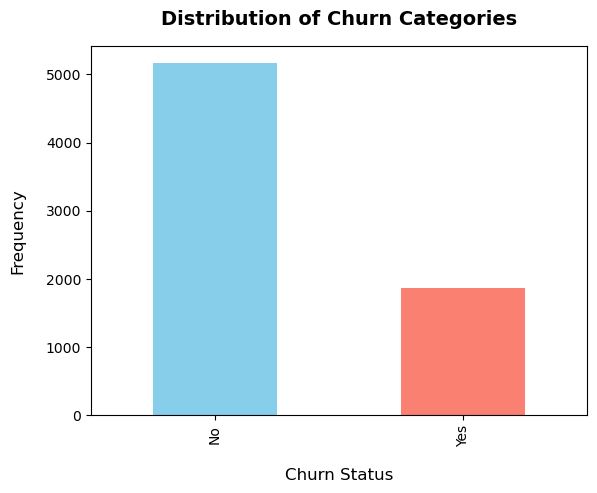

In [35]:
# visulaizing the distribution of churn variable
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.ylabel('Frequency', fontsize=12, labelpad=15)
plt.xlabel('Churn Status', fontsize=12, labelpad=15)
plt.title('Distribution of Churn Categories', fontsize=14, fontweight='bold', pad=15)
plt.show()

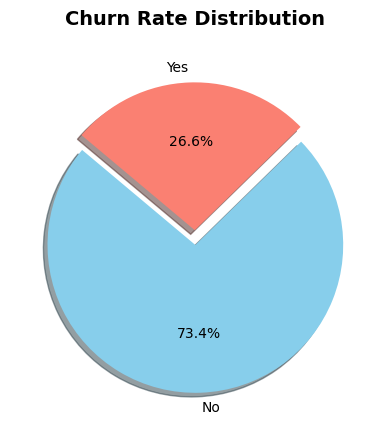

In [36]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140 ,explode=(0.1,0), shadow=True, colors=['skyblue', 'salmon'])
plt.ylabel("")
plt.title("Churn Rate Distribution", fontsize=14, fontweight='bold', pad=15)
plt.show()

In [37]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

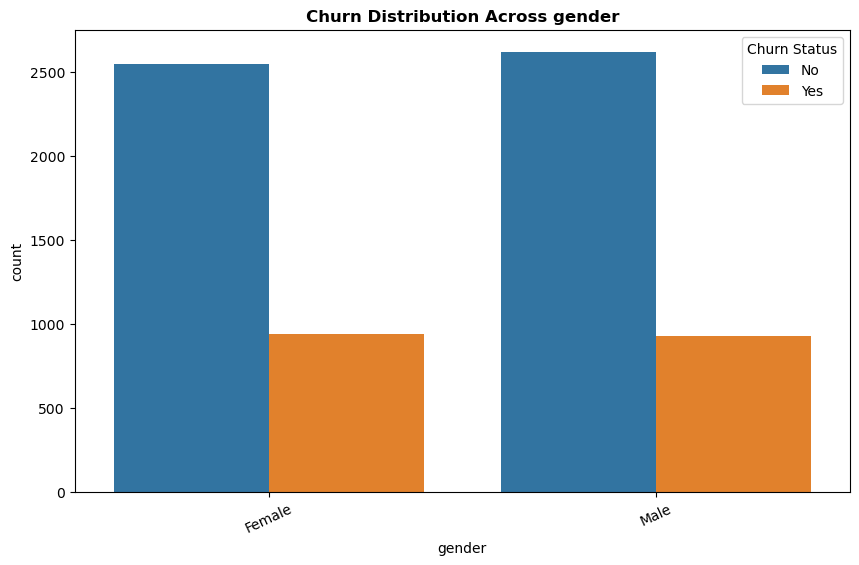

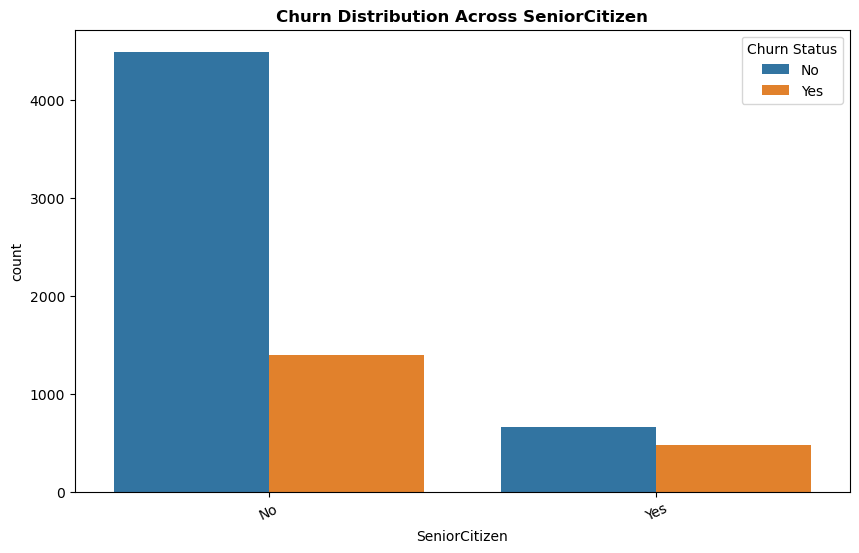

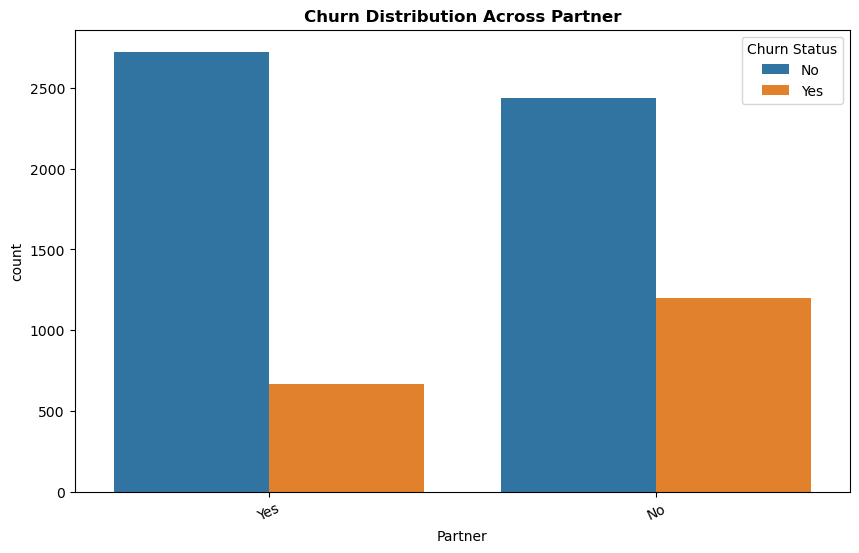

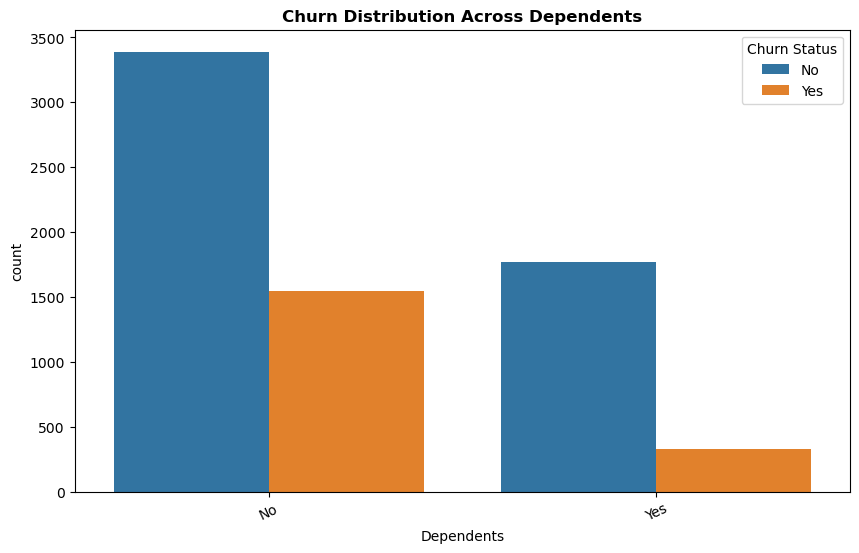

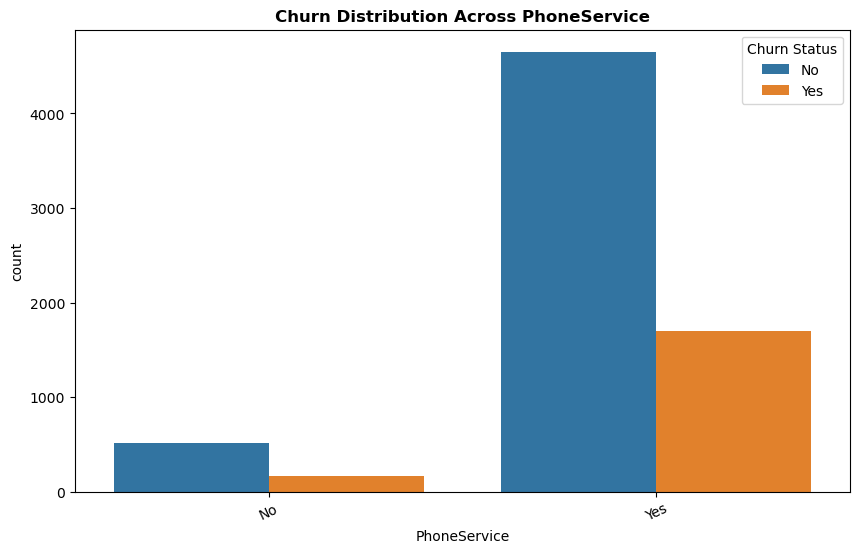

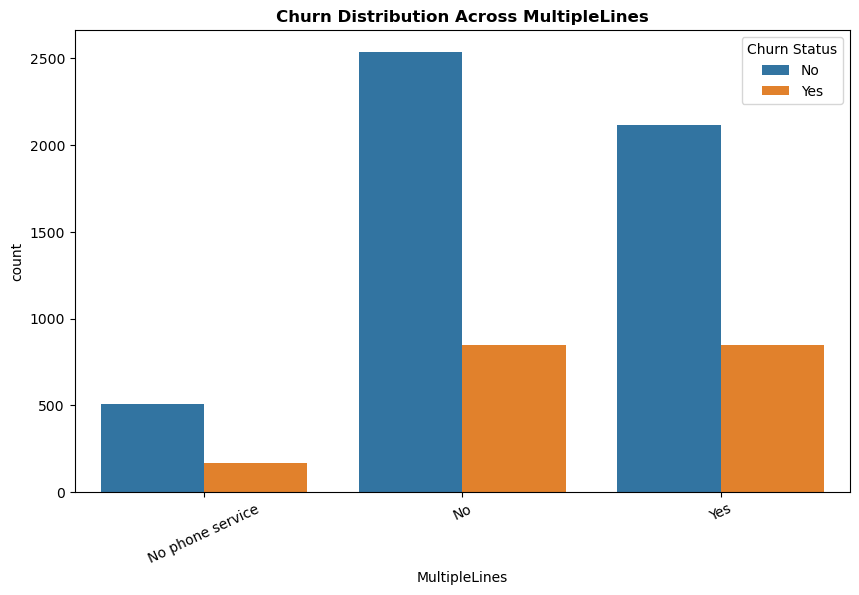

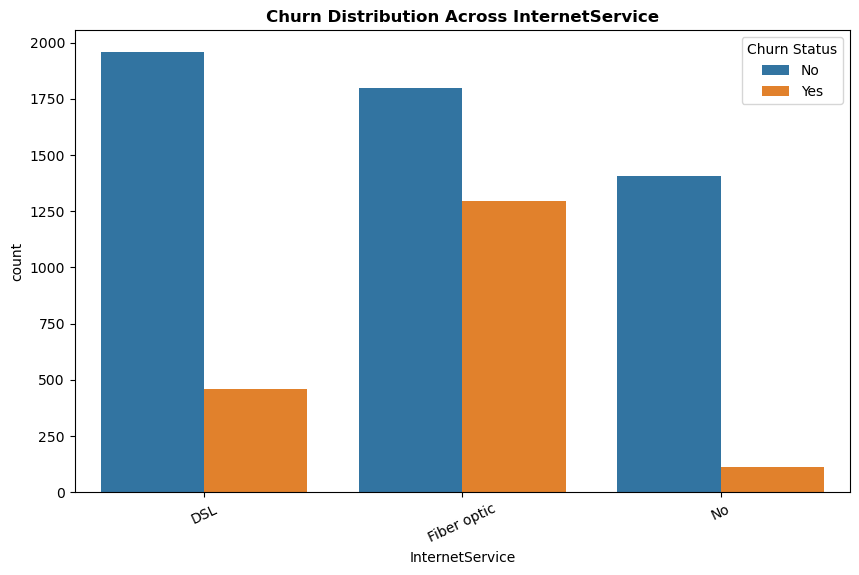

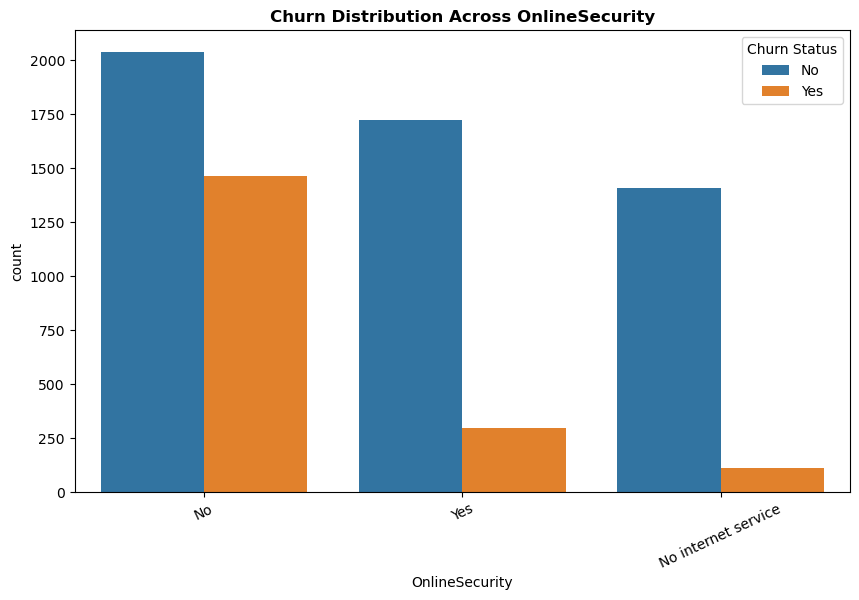

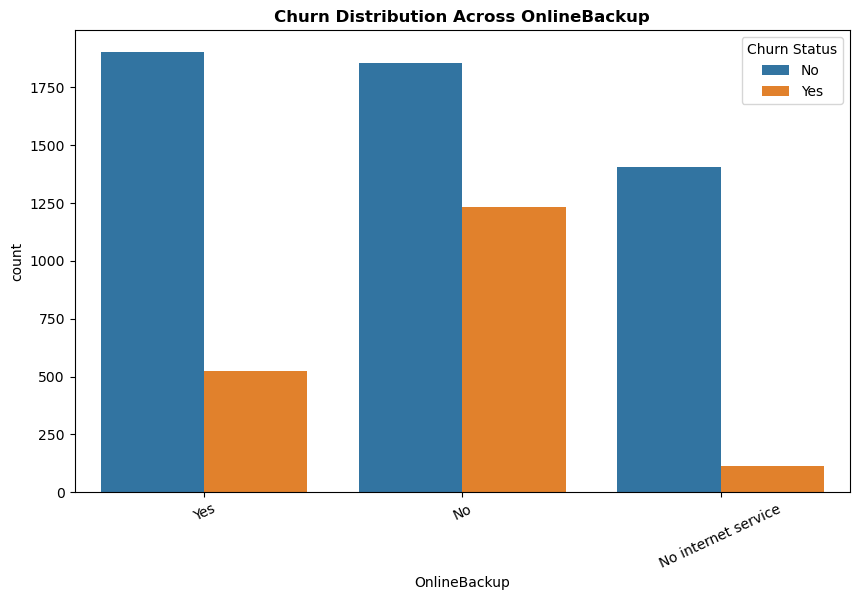

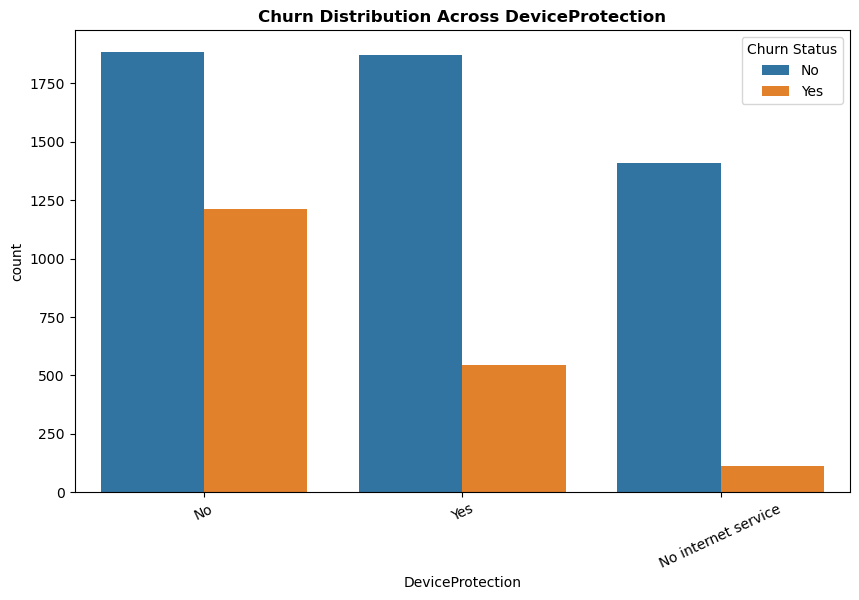

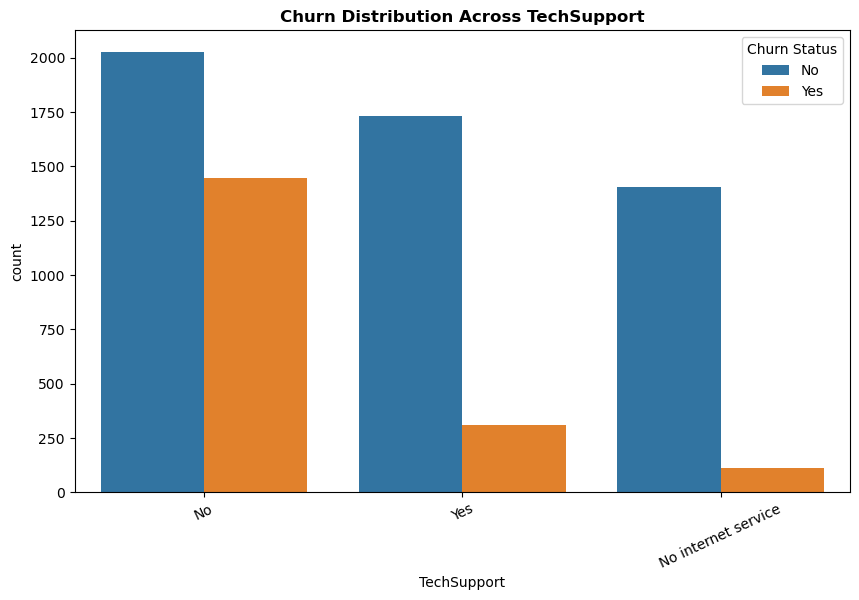

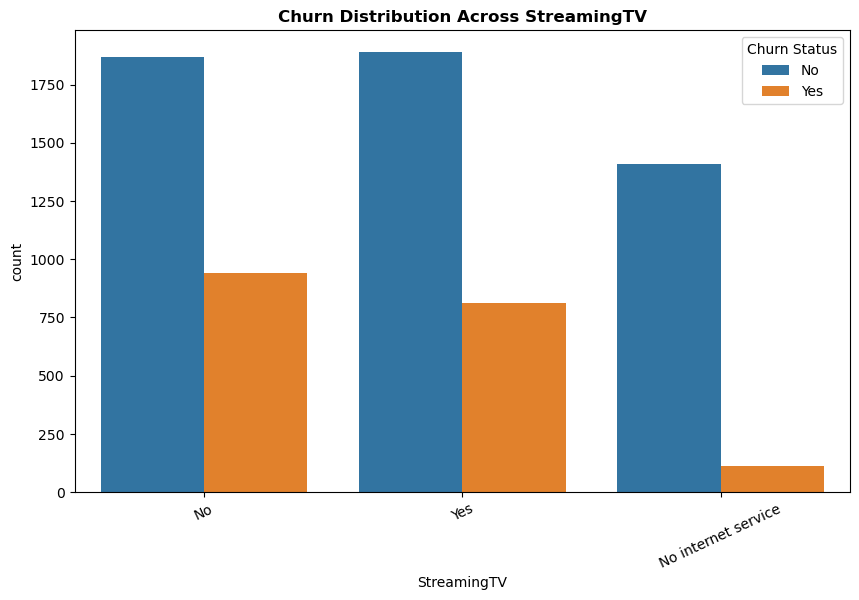

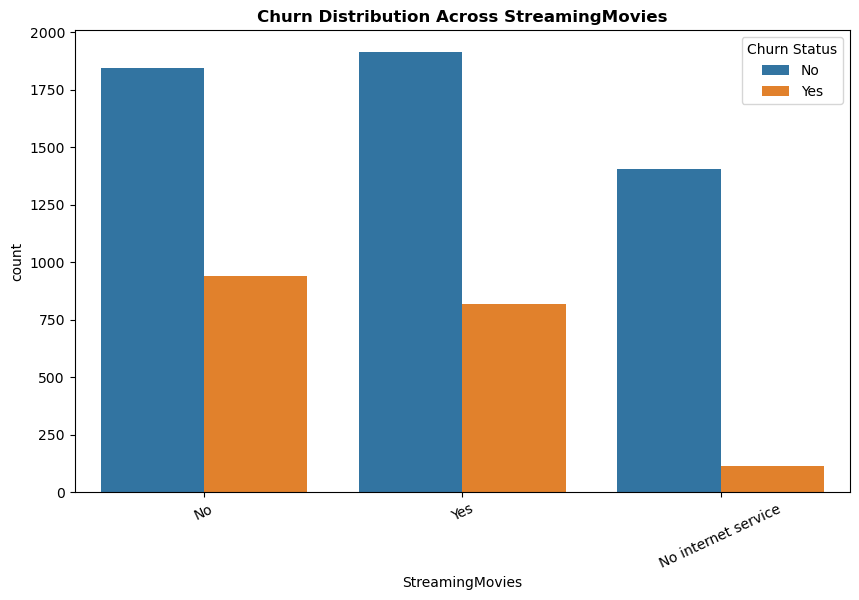

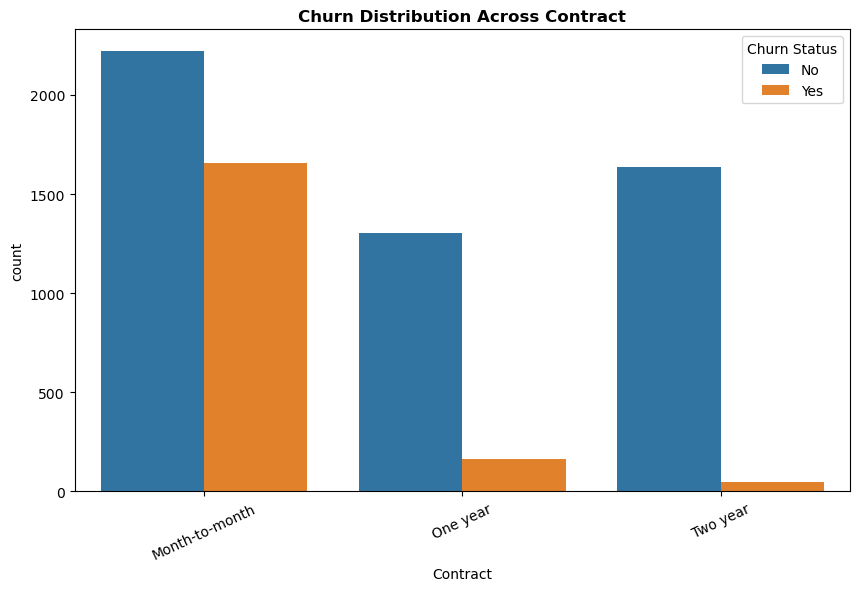

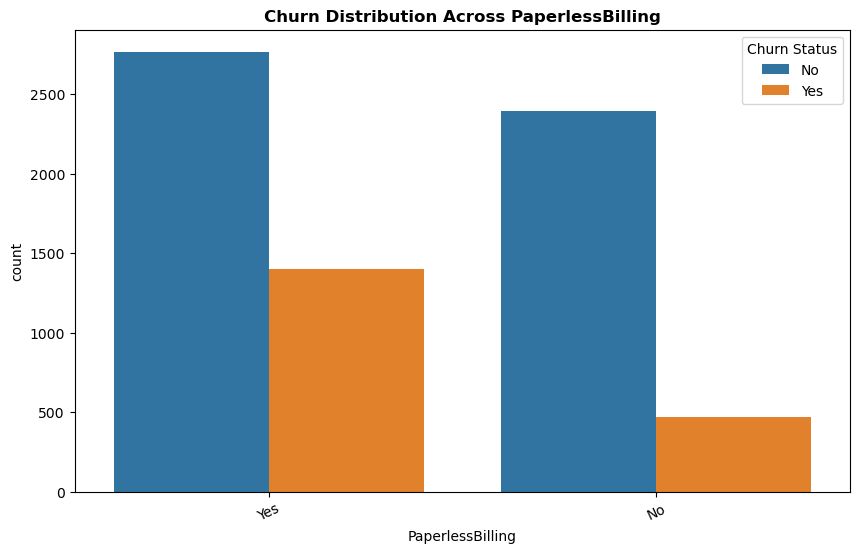

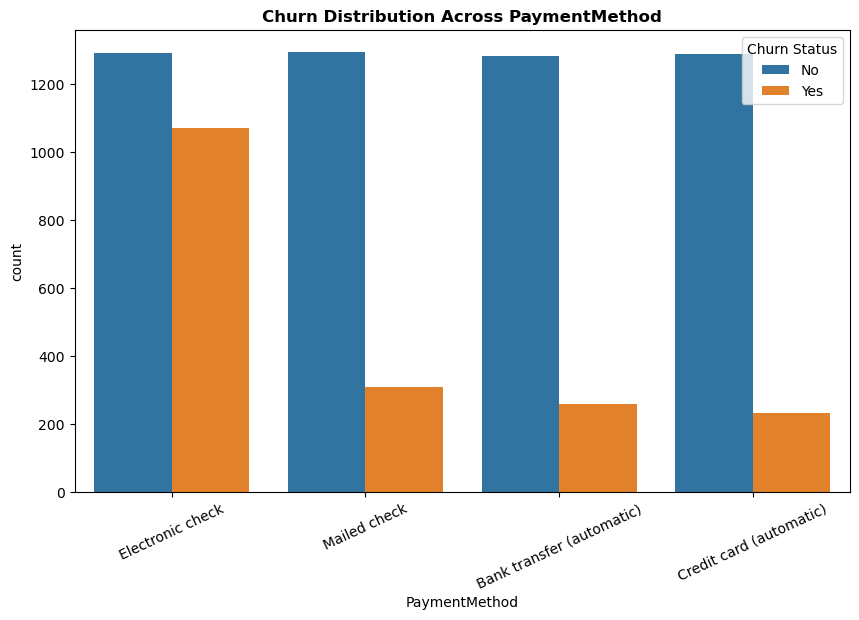

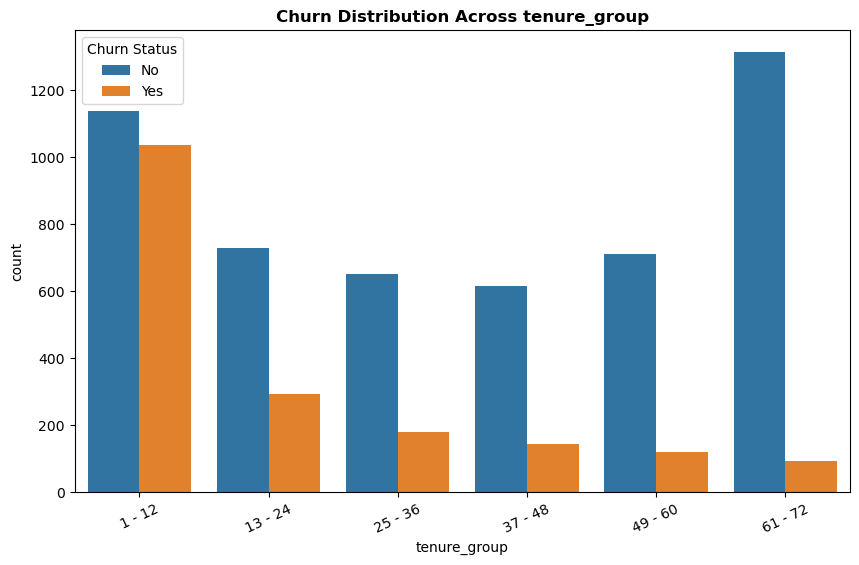

In [38]:
# visualizing the distribution of each categorical feature with respect to churn
for idx, feature in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(idx, figsize=(10,6))
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f"Churn Distribution Across {feature}", fontweight='bold')
    plt.xticks(rotation=25)
    plt.legend(title='Churn Status')
    plt.show()
    print("\n\n")

### **Univariate Analysis:**

- Customers who use streaming movies are less likely to churn.  
- Month-to-month contracts have the highest churn.  
- One-year and two-year contracts show very low churn rates.
- Churn is much higher for Fiber optic users compared to DSL users.  
- Paperless billing users churn more compared to those who receive paper bills.  
- Customers paying through electronic checks tend to churn the most.  
- Automatic payments (bank transfer or credit card) users are more stable.  
- New customers with less than a year of tenure churn the most.  
- Customers with higher tenure rarely churn.  

In [40]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


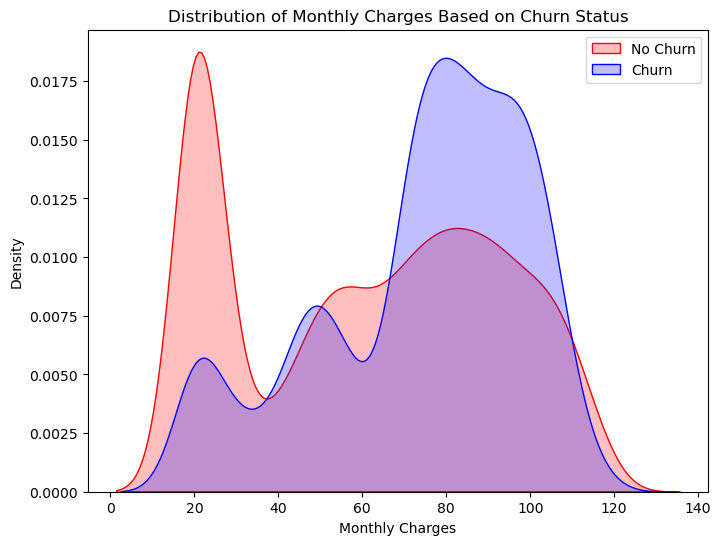

In [41]:
# visualizing the distribution of Monthly Charges for churned and non-churned customers
plt.figure(figsize=(8,6))
sns.kdeplot(df[df["Churn"]=='No']['MonthlyCharges'], shade=True, color='red', label="No Churn")
sns.kdeplot(df[df['Churn']=='Yes']['MonthlyCharges'], shade=True, color='blue', label="Churn")
plt.legend(loc='upper right')
plt.xlabel("Monthly Charges")
plt.title('Distribution of Monthly Charges Based on Churn Status')
plt.show()

**Insight**: Customers with higher monthly charges tend to have a higher churn rate.

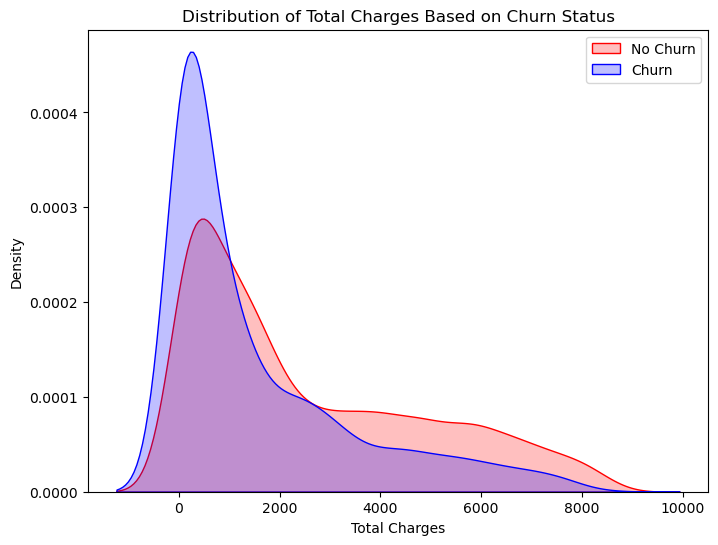

In [43]:
# visualizing the distribution of Total Charges for churned and non-churned customers
plt.figure(figsize=(8,6))
sns.kdeplot(df[df['Churn']=='No']['TotalCharges'], shade=True, color='red', label="No Churn")
sns.kdeplot(df[df['Churn']=='Yes']['TotalCharges'], shade=True, color='blue', label='Churn')
plt.legend(loc='upper right')
plt.xlabel('Total Charges')
plt.title("Distribution of Total Charges Based on Churn Status")
plt.show()

**Key Insight:**  
Churn tends to be higher when **Total Charges** are lower.  

However, when analyzing **Tenure, Monthly Charges, and Total Charges** together, a clearer pattern emerges—**higher Monthly Charges with shorter Tenure lead to lower Total Charges**. This suggests that customers with **high Monthly Charges, low Tenure, and low Total Charges** are more likely to churn.

## 5️⃣ **Bivariate Analysis** 

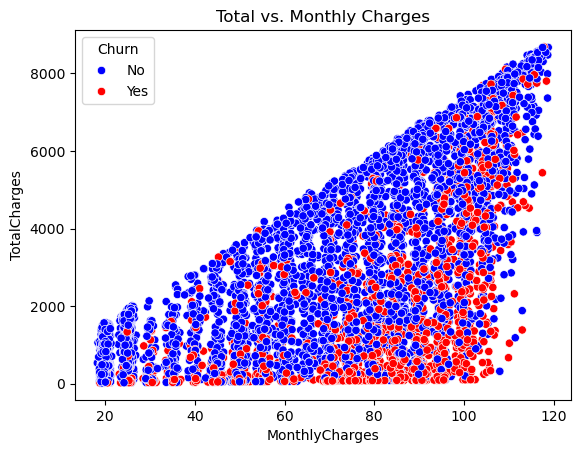

In [46]:
# Relation berween Monthly Charges and Total Charges
sns.scatterplot(df, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette={'Yes': 'red', 'No': 'blue'})
plt.title("Total vs. Monthly Charges")
plt.show()

**Total Charges** increase as **Monthly Charges** increase.

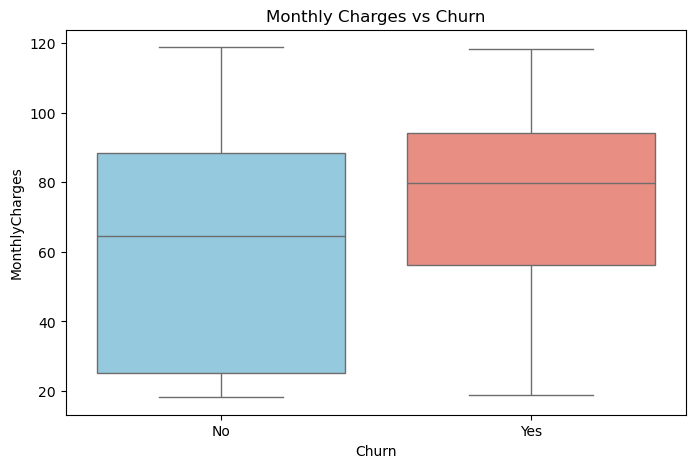

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(df,x="Churn", y='MonthlyCharges', palette=["skyblue", "salmon"])
plt.title('Monthly Charges vs Churn')
plt.show()

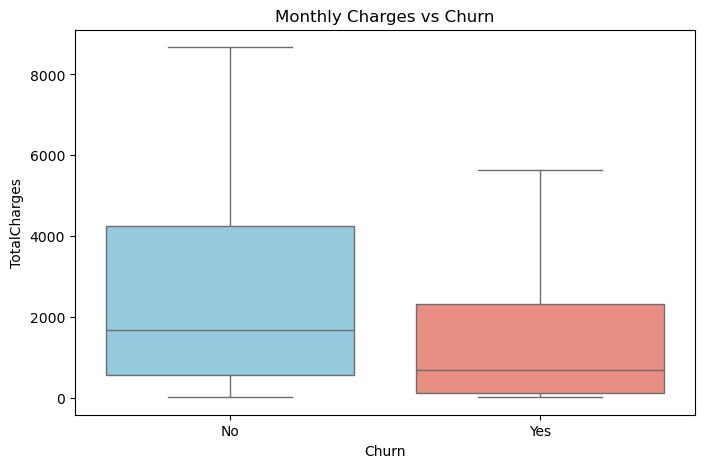

In [49]:
plt.figure(figsize=(8,5))
sns.boxplot(df,x="Churn", y='TotalCharges', showfliers=False, palette=["skyblue", "salmon"])
plt.title('Monthly Charges vs Churn')
plt.show()

In [50]:
# spliting data based on churn status
churn_yes = df[df["Churn"]=='Yes']
churn_no = df[df["Churn"]=='No']

In [51]:
# custom plotng fucntion for categorical variables
def custom_plot(data, feature, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams.update({'axes.labelsize':17, 'axes.titlesize':19, 'axes.titlepad':23})

    feature_unique_count = data[feature].nunique()
    hue_unique_count = data[hue].nunique() if hue else 0
    width = feature_unique_count + 7 + 4 * hue_unique_count
    
    fig, ax = plt.subplots(figsize=(width, 8))

    plt.xticks(rotation=25)
    plt.yscale('log')
    plt.title(title, fontweight='bold')

    sns.countplot(data=data, x=feature, hue=hue, order=data[feature].value_counts().index, palette='Set2', ax=ax)
    plt.show()

In [52]:
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'], dtype=object)

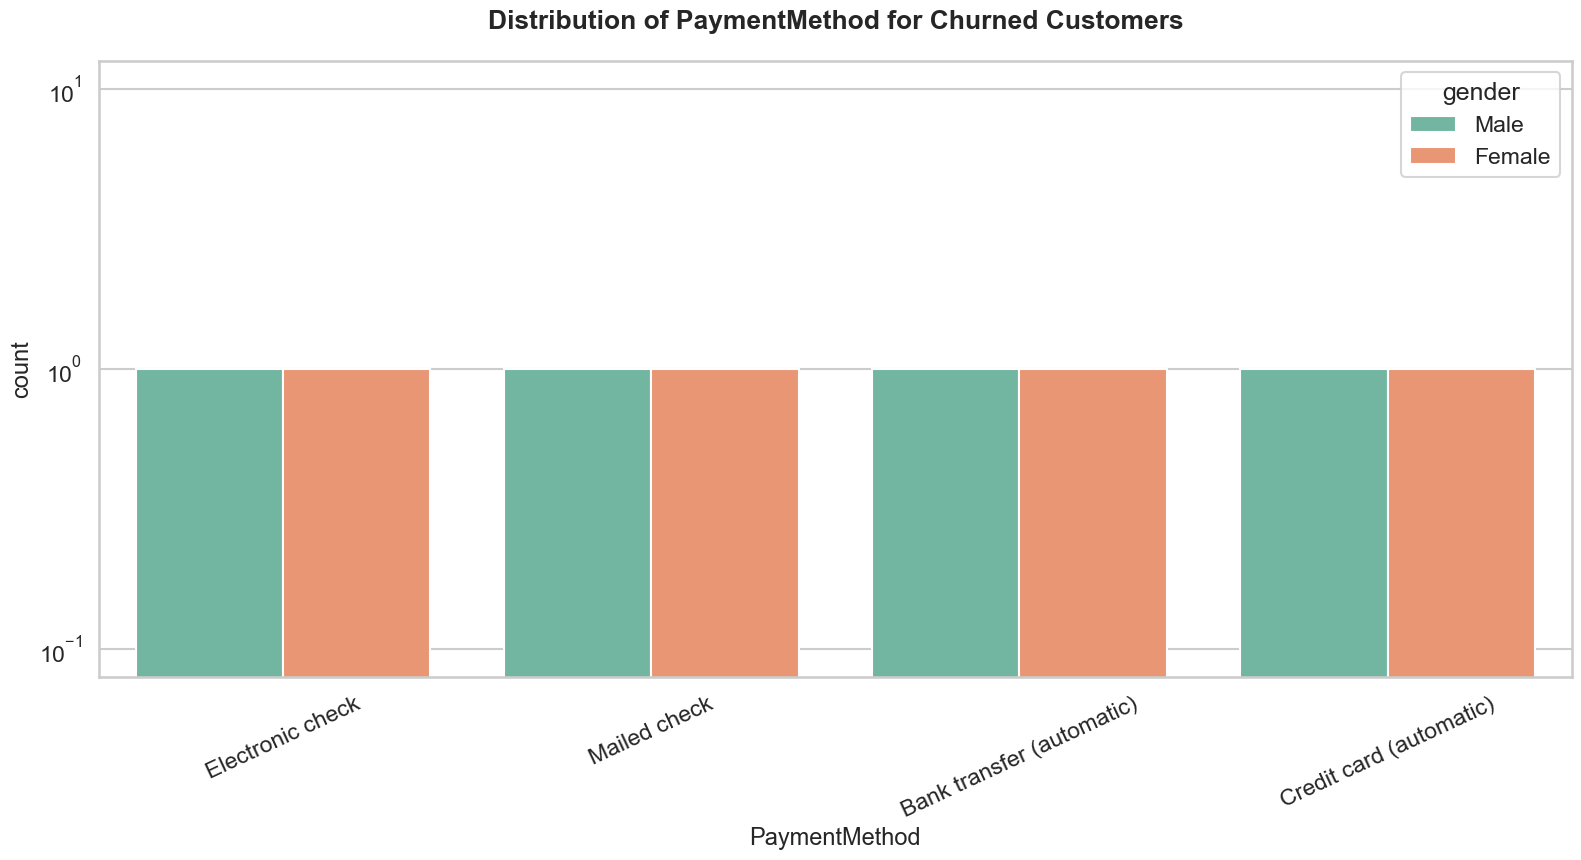

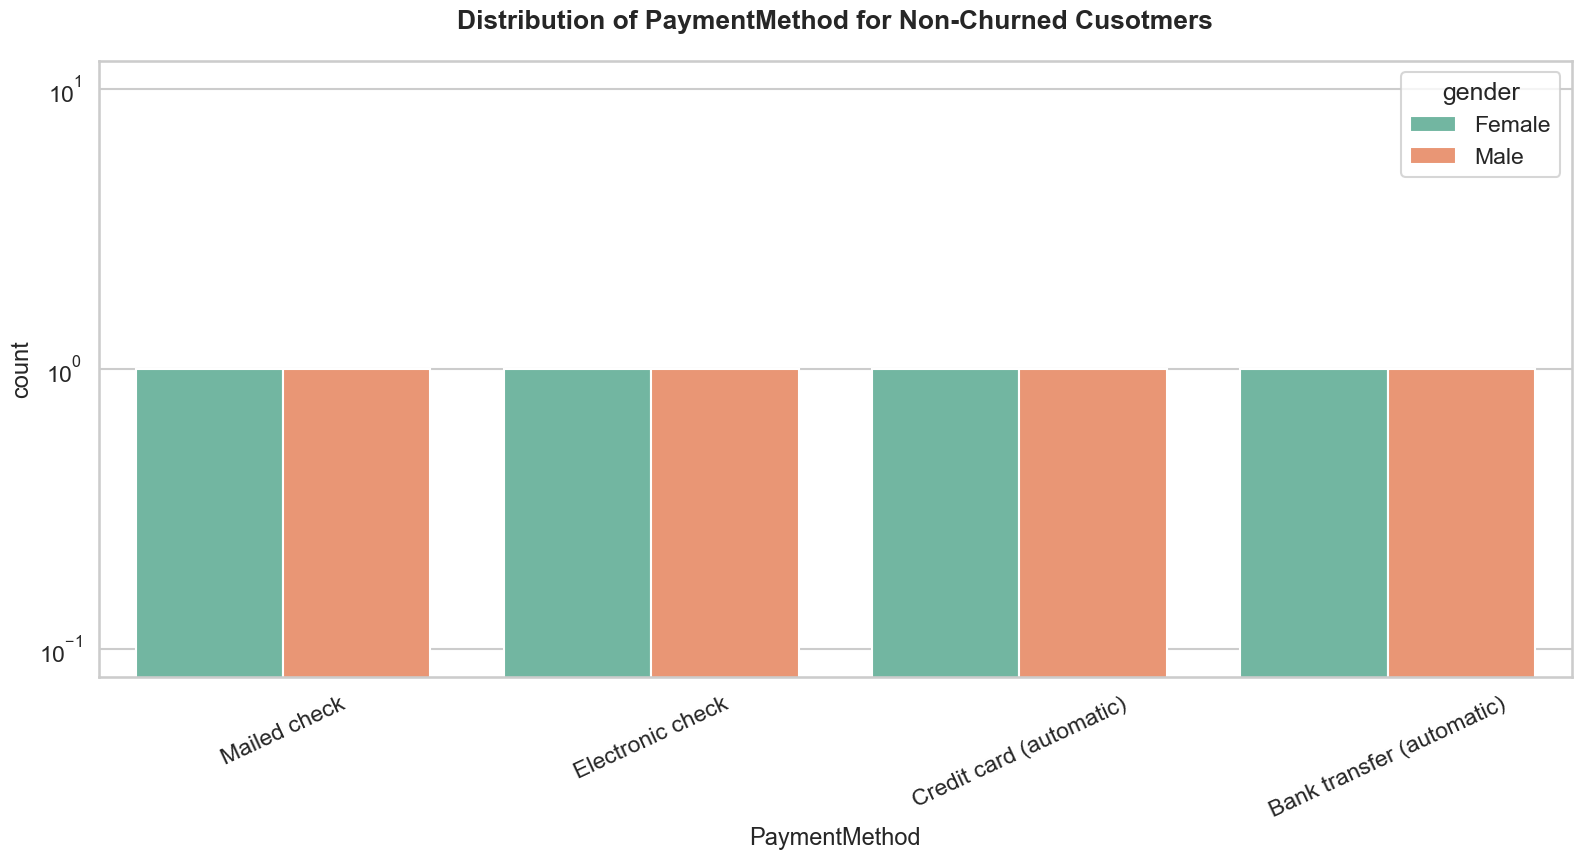

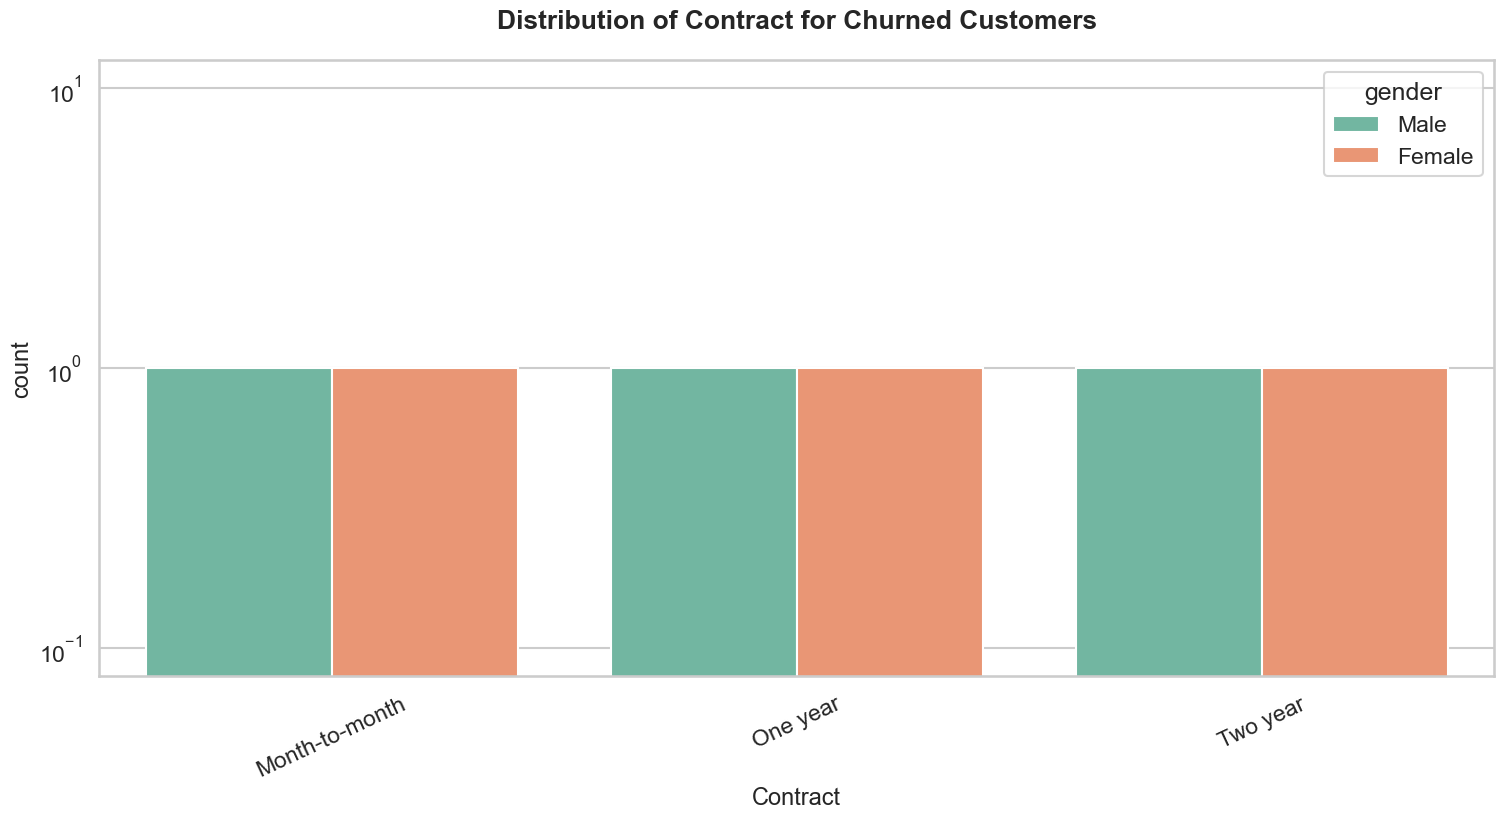

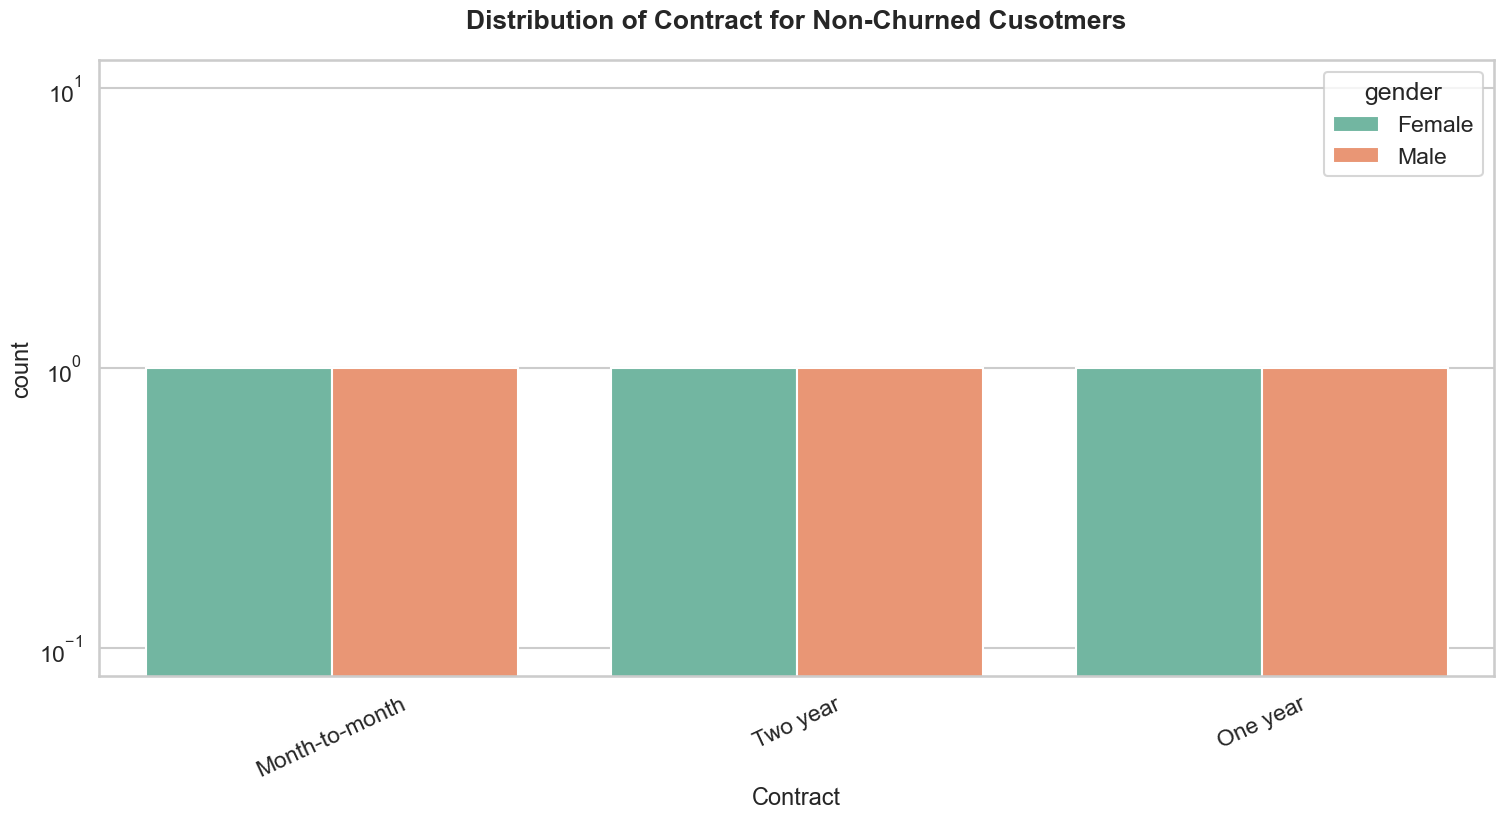

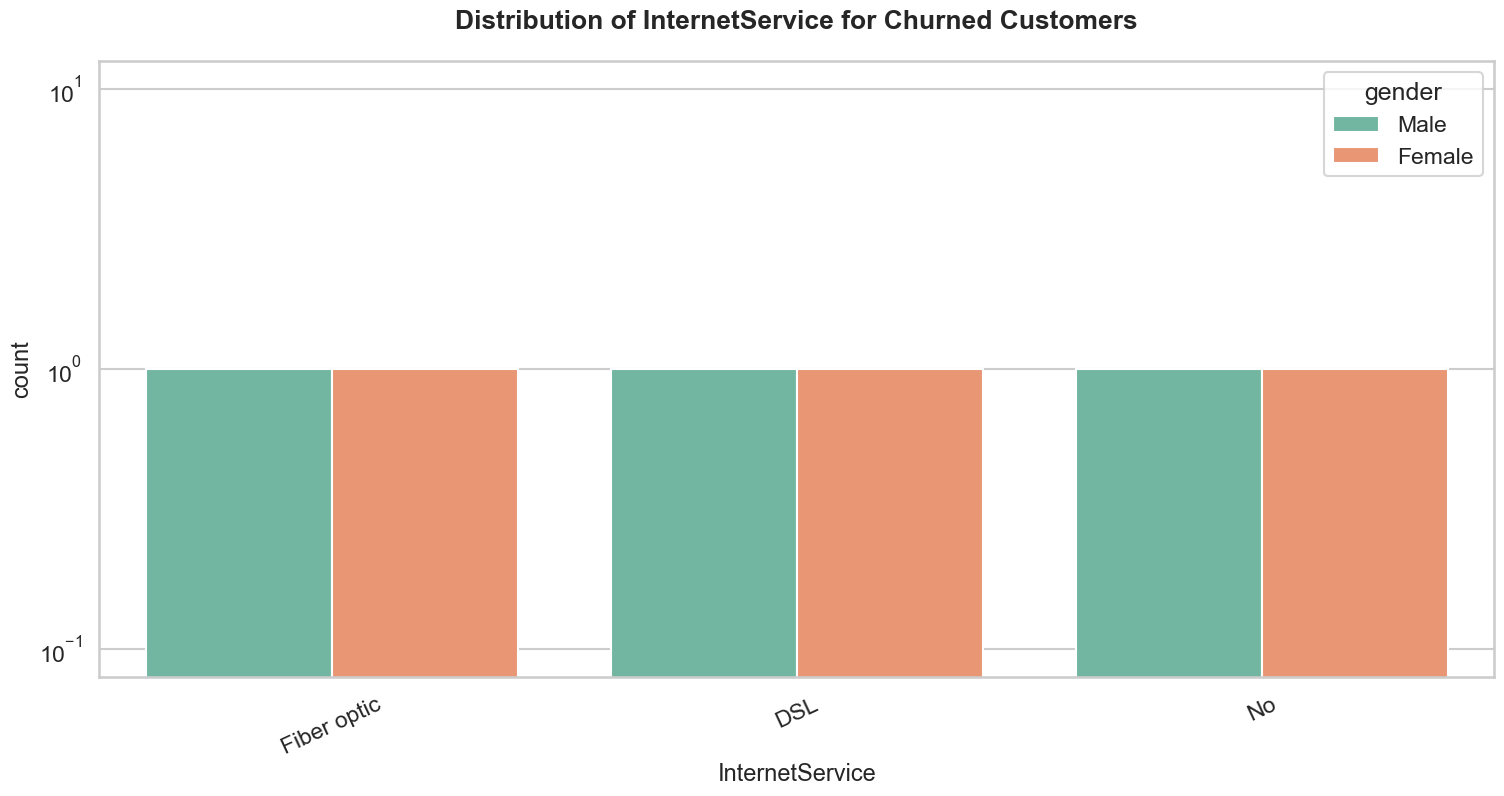

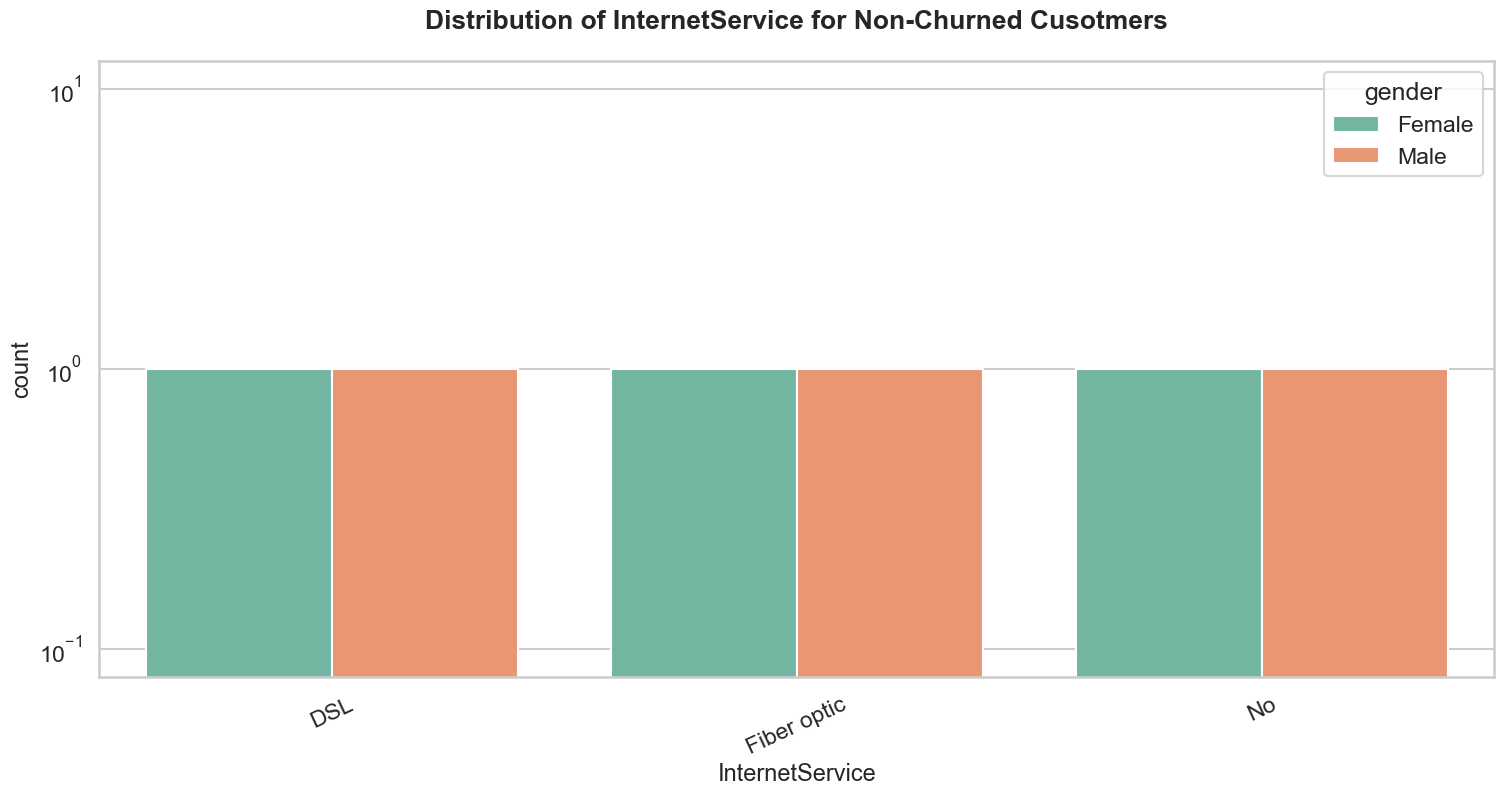

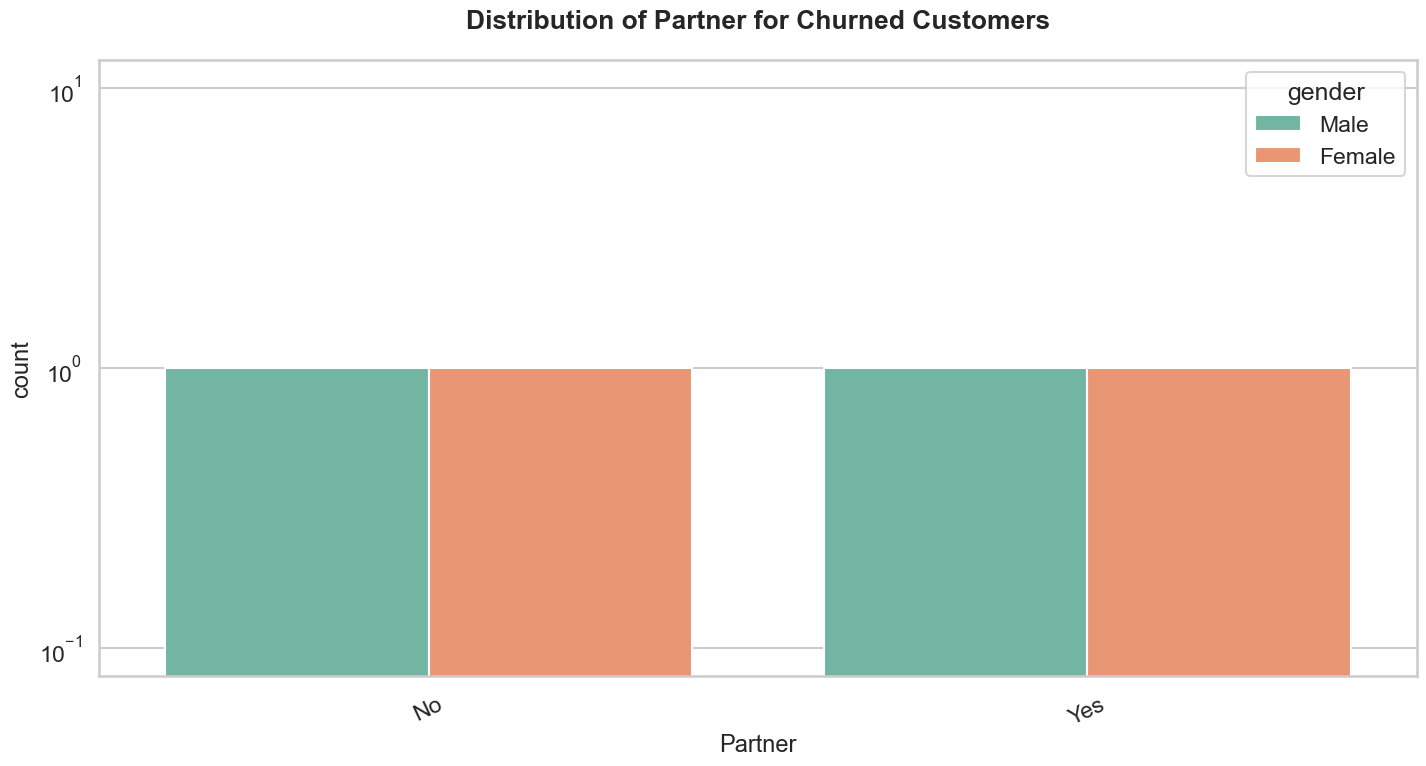

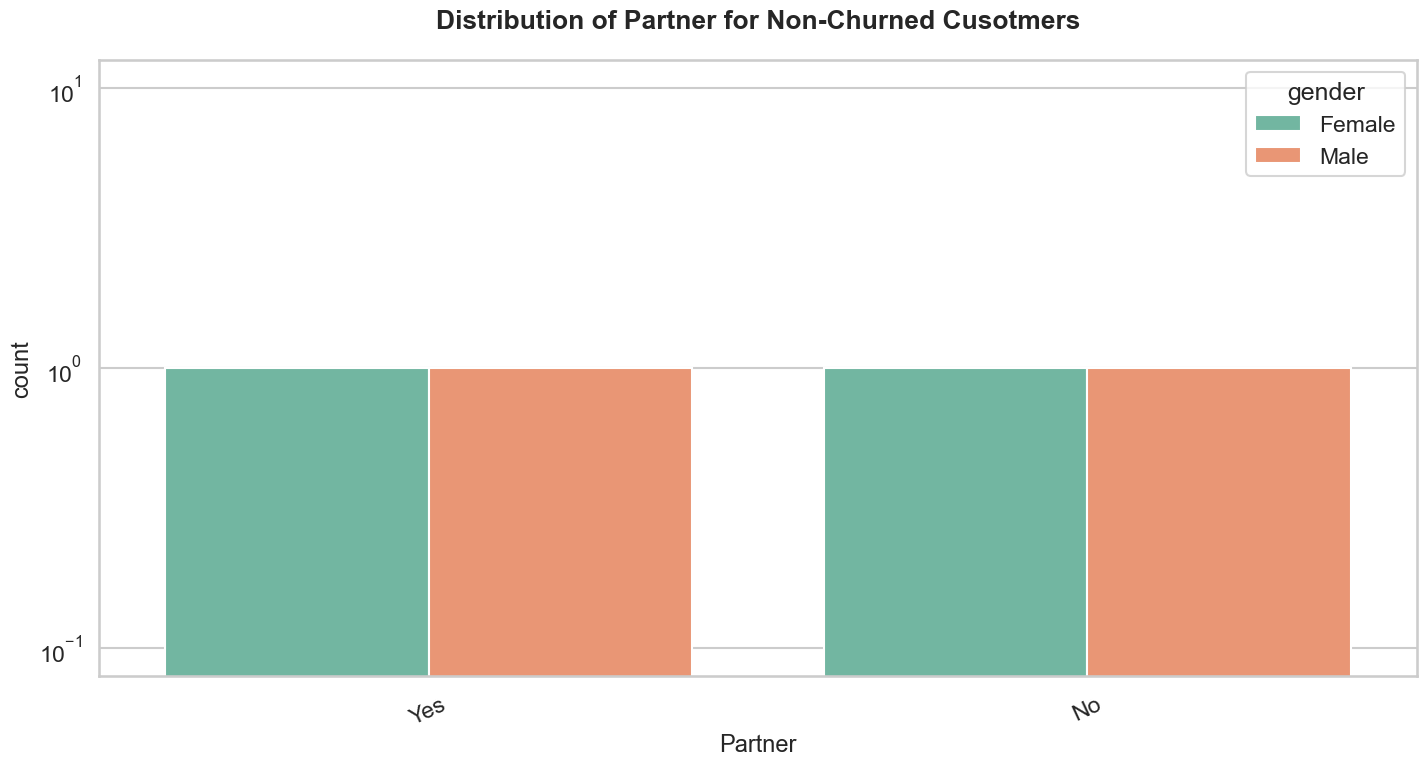

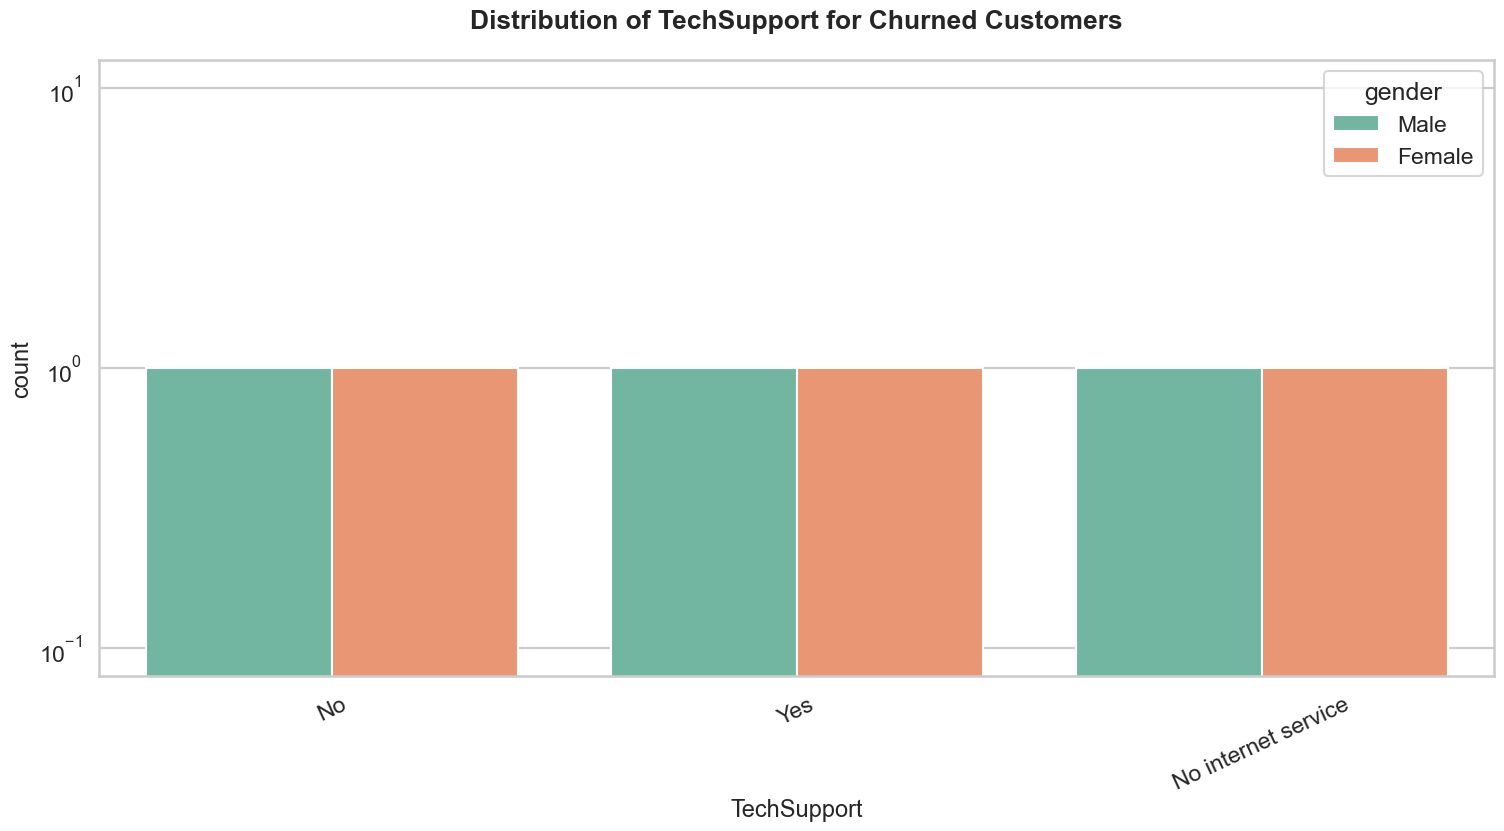

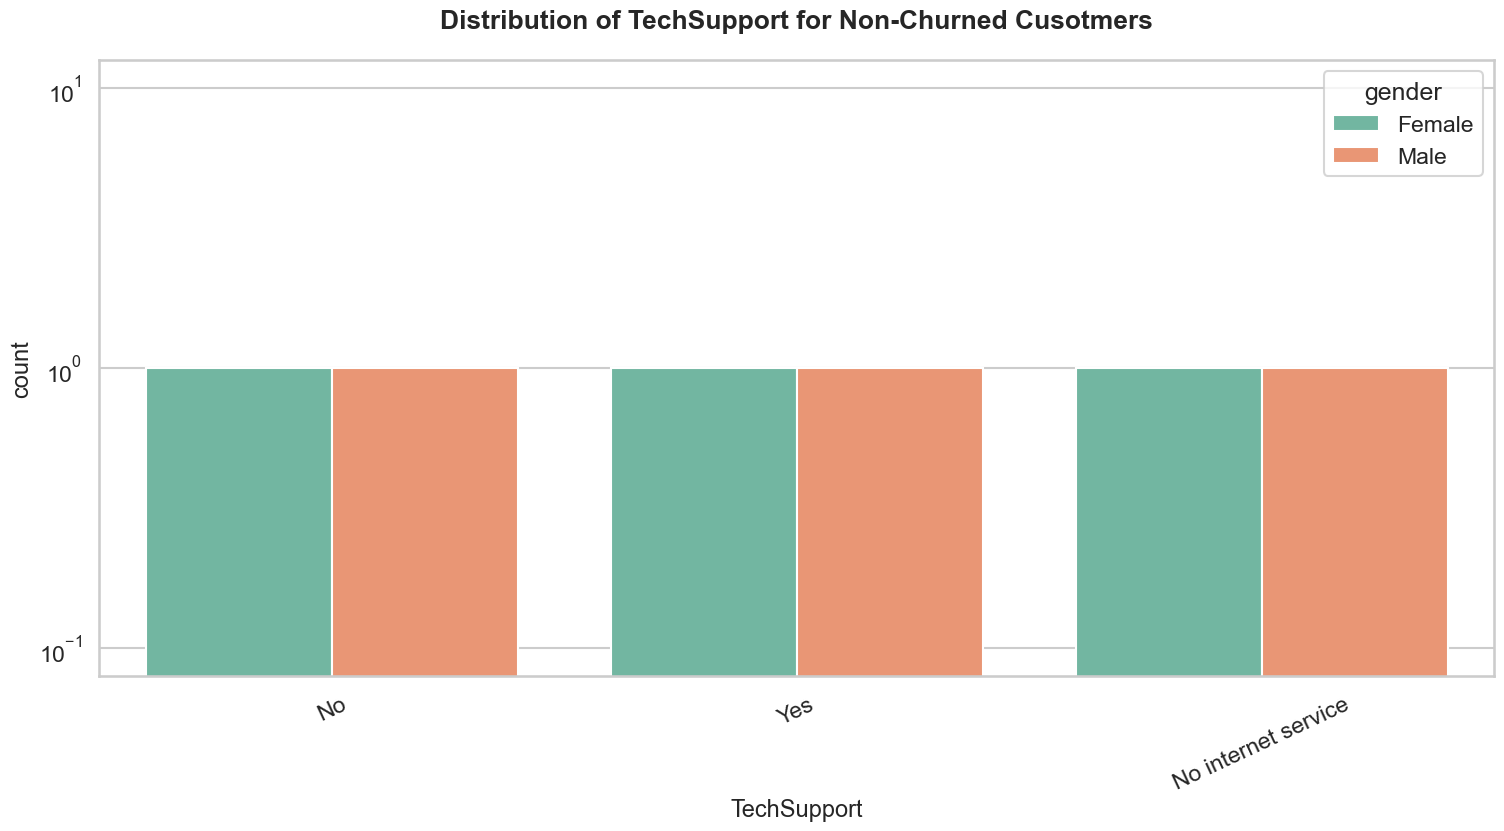

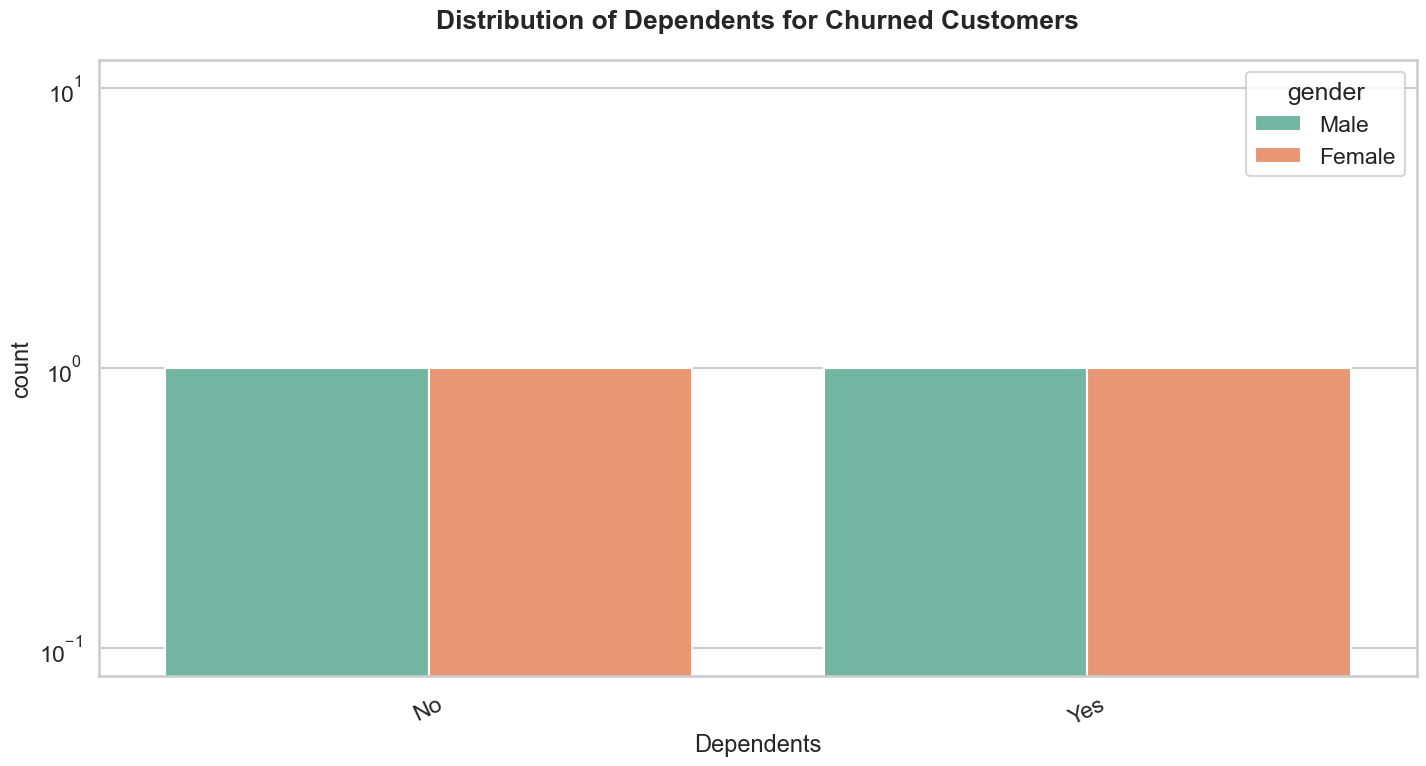

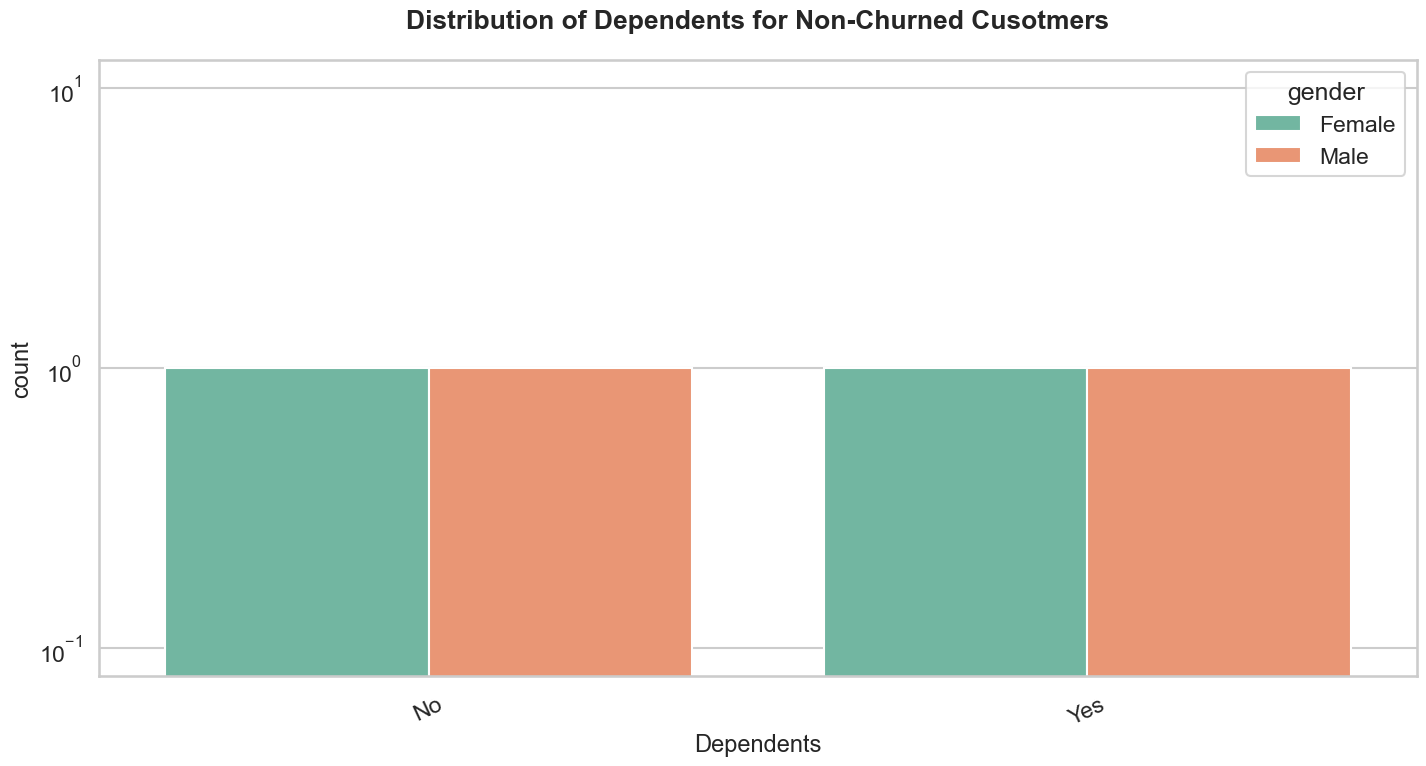

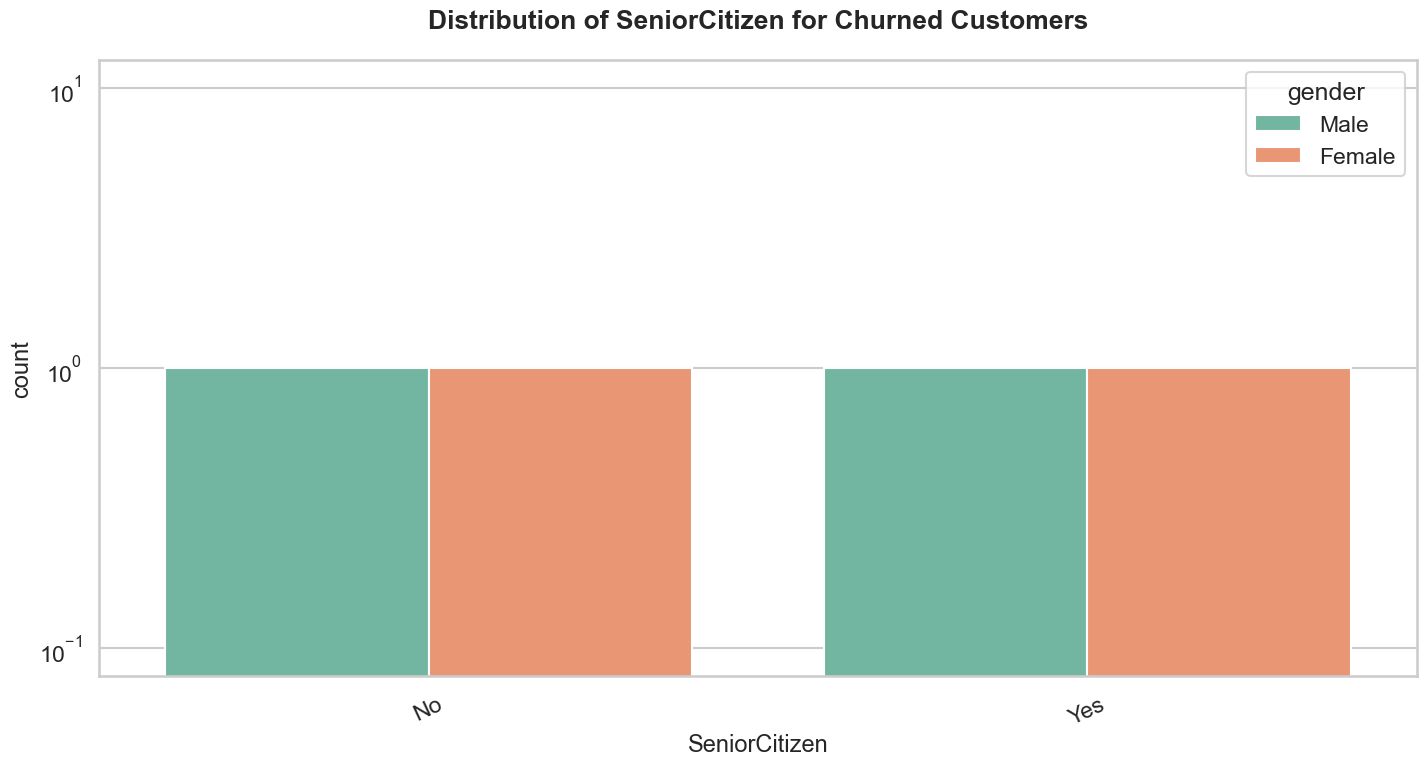

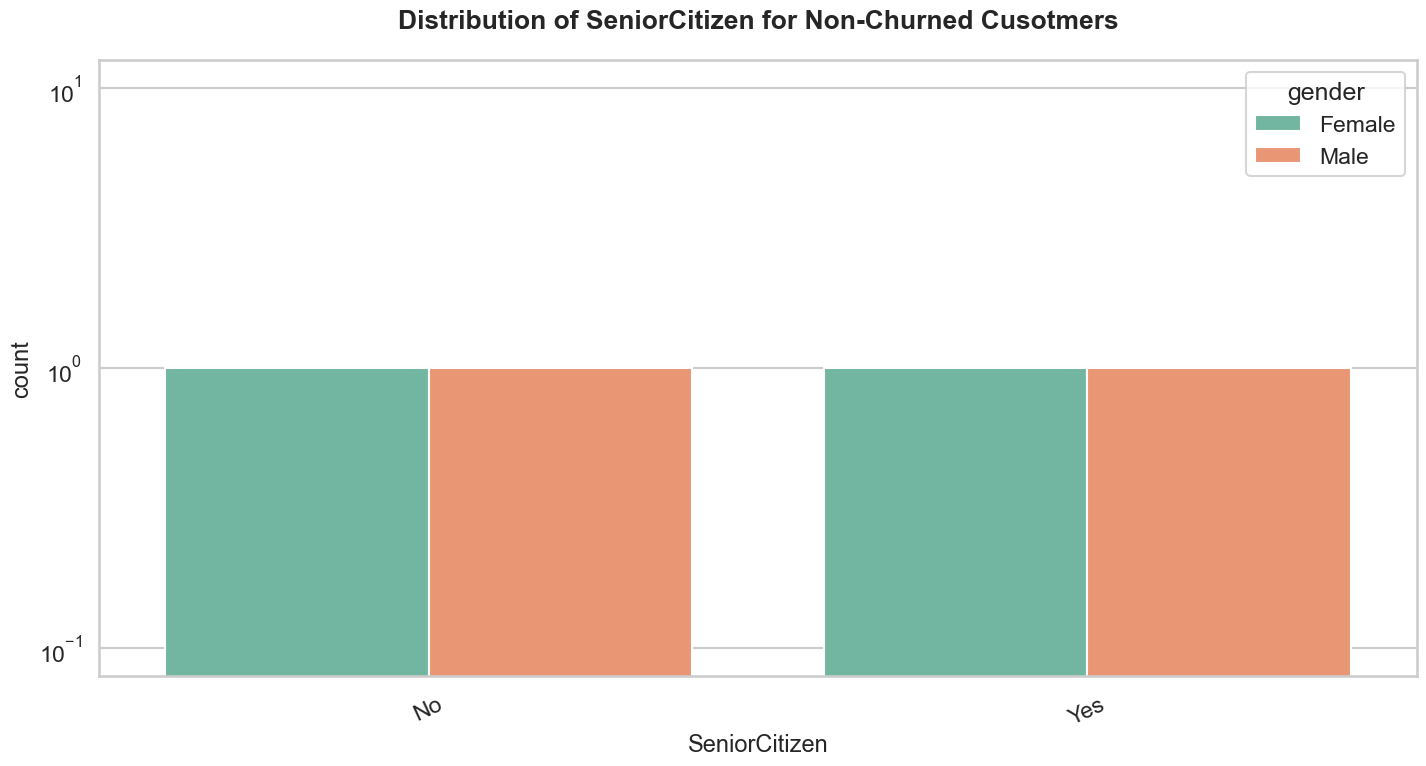

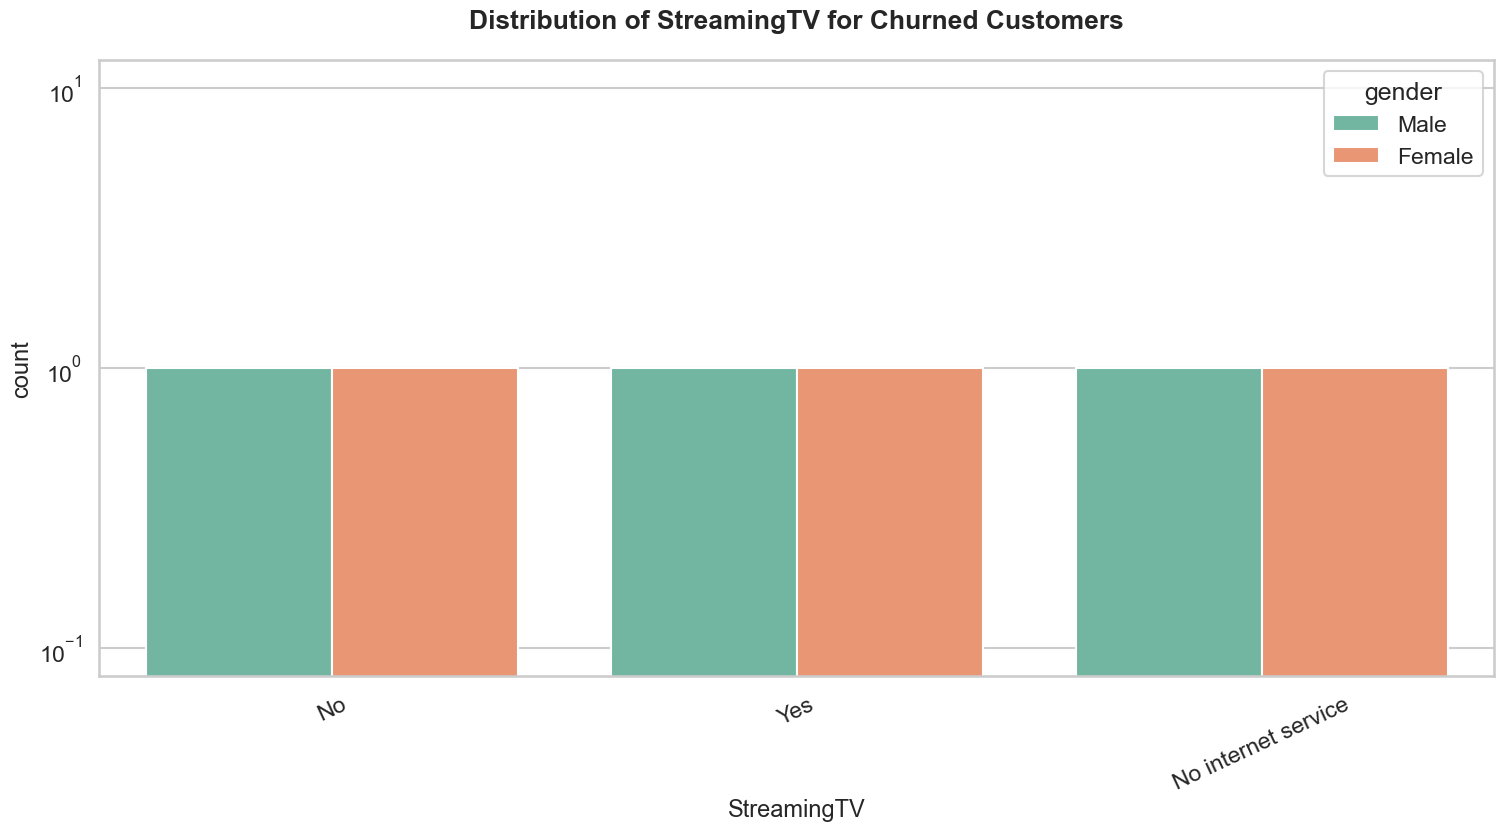

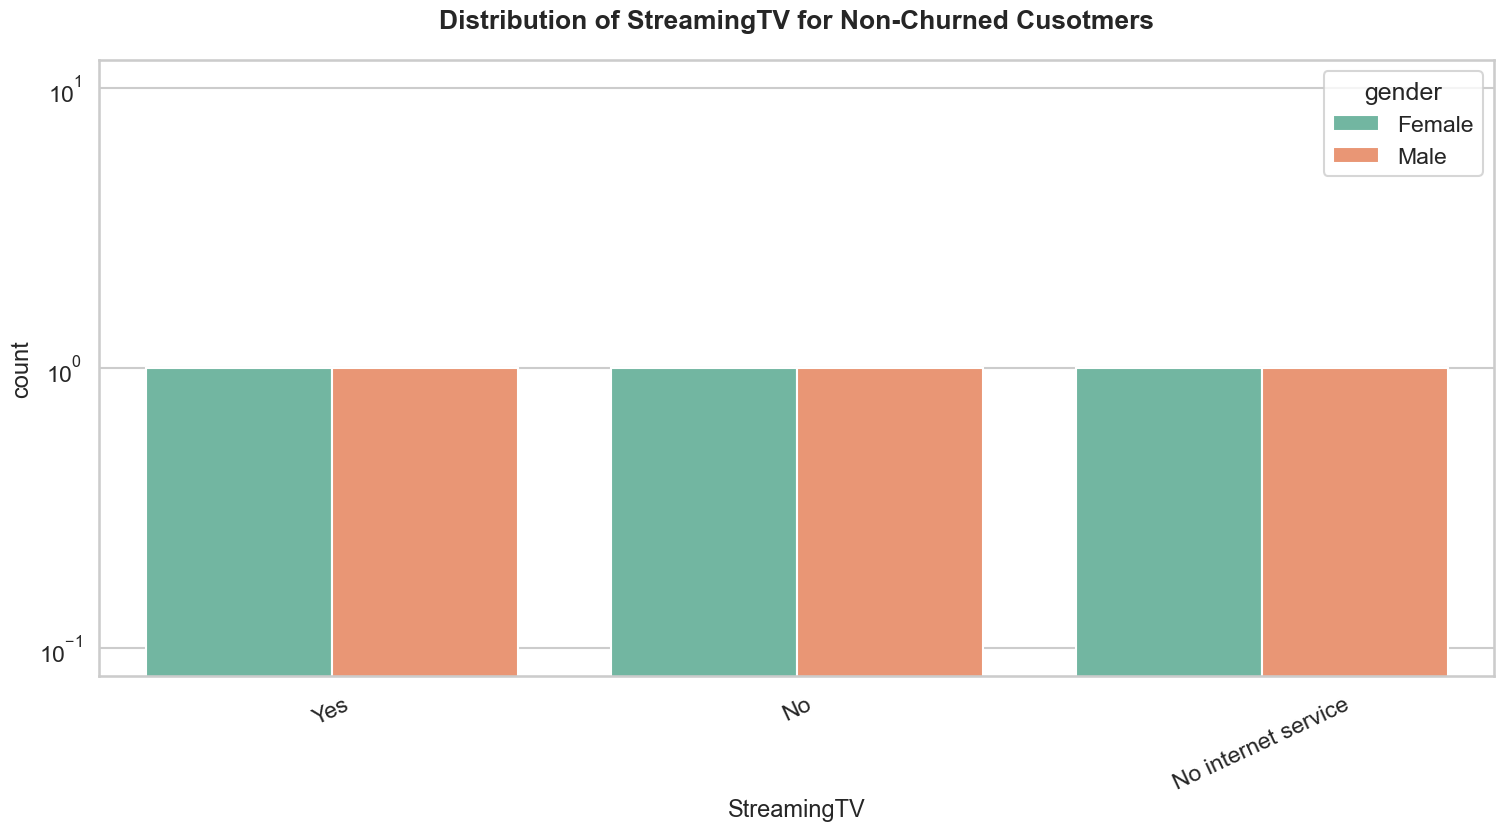

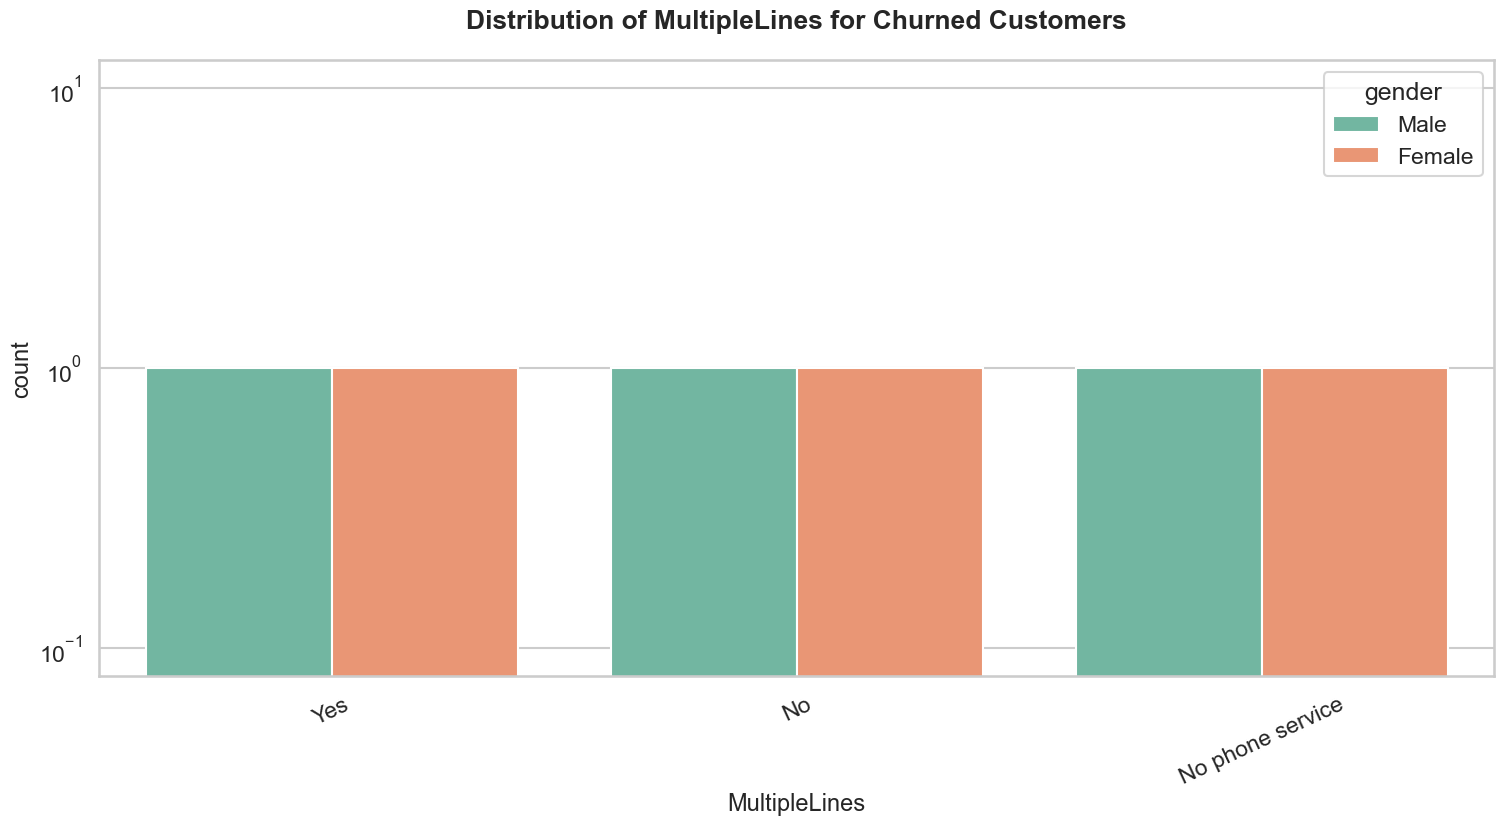

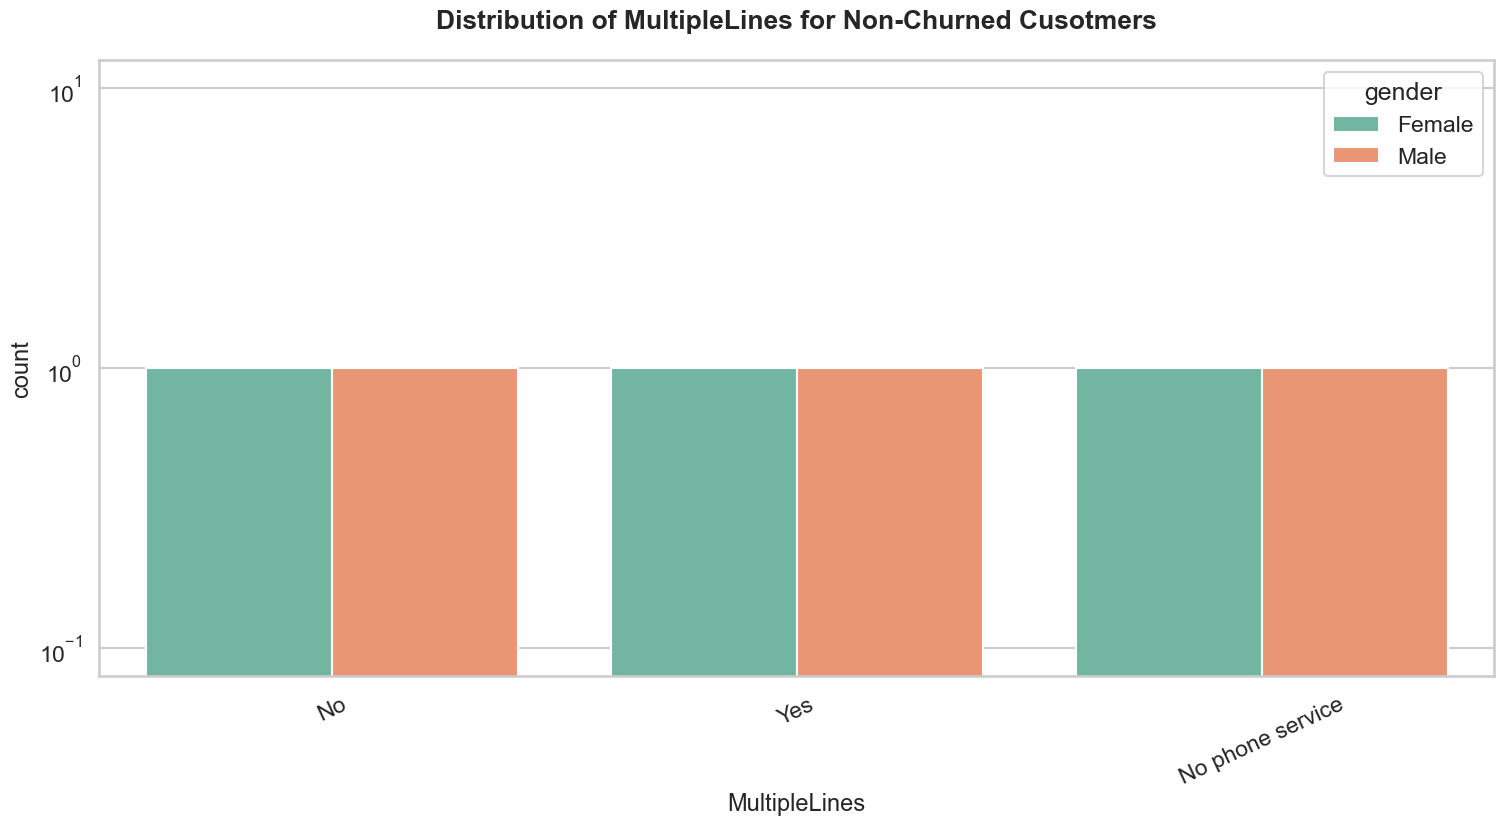

In [53]:
cat_features = ['PaymentMethod', 'Contract', 'InternetService', 'Partner', 'TechSupport', 'Dependents', 'SeniorCitizen', 'StreamingTV', 'MultipleLines']

for feature in cat_features:
    # plot for churned customers
    custom_plot(churn_yes, feature=feature, title=f'Distribution of {feature} for Churned Customers', hue='gender')
    print("\n")
    # plot for non churned customers
    custom_plot(churn_no, feature=feature, title=f'Distribution of {feature} for Non-Churned Cusotmers', hue='gender')
    print("\n")

### **Bivariate Analysis:**
 
- Both males and females have similar churn patterns.
- Churned customers are almost equally split between having Streaming TV and not having it.  
- Gender doesn’t make much difference in churn behavior for Streaming TV users.  
- Fiber optics Internet Service users are more churners.
- DSL InternetService users are less churners.  
- Non-churned customers are slightly more likely to have Streaming TV.  
- Churned customers are also almost equally split between having multiple lines and not.  
- A few churned customers don’t even have phone service.  
- Non-churned customers slightly lean towards not having multiple lines.  
- Gender impact is minimal across all categories.  


In [55]:
def plot_stacked_bar(feature):
    crosstab = pd.crosstab(df[feature], df['Churn'])
    crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0)
    crosstab_norm.plot(kind='bar', stacked=True, figsize=(8,5))
    plt.title(f"Stacked Bar Chart for {feature}", fontweight='bold')
    plt.ylabel('Proportion')
    plt.legend(title='Churn', bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=25)
    plt.show()

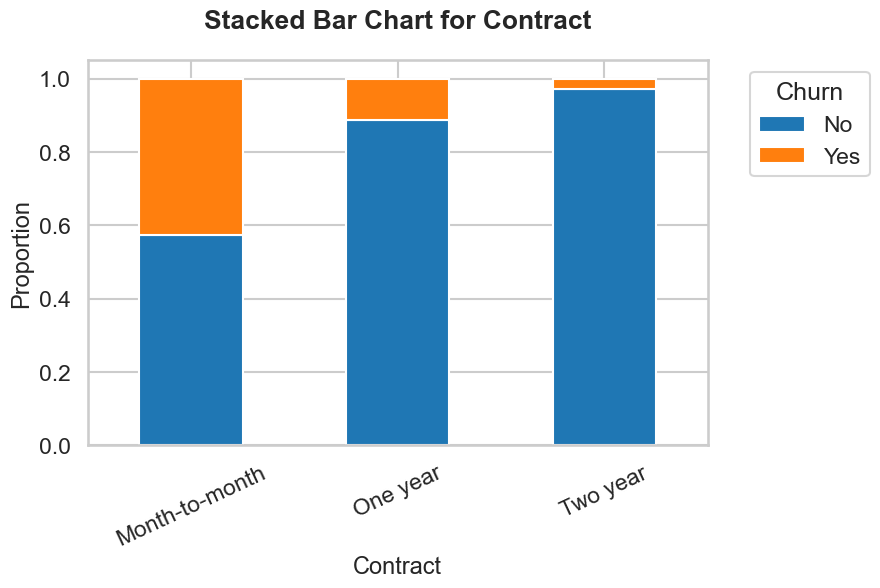

In [56]:
plot_stacked_bar('Contract')

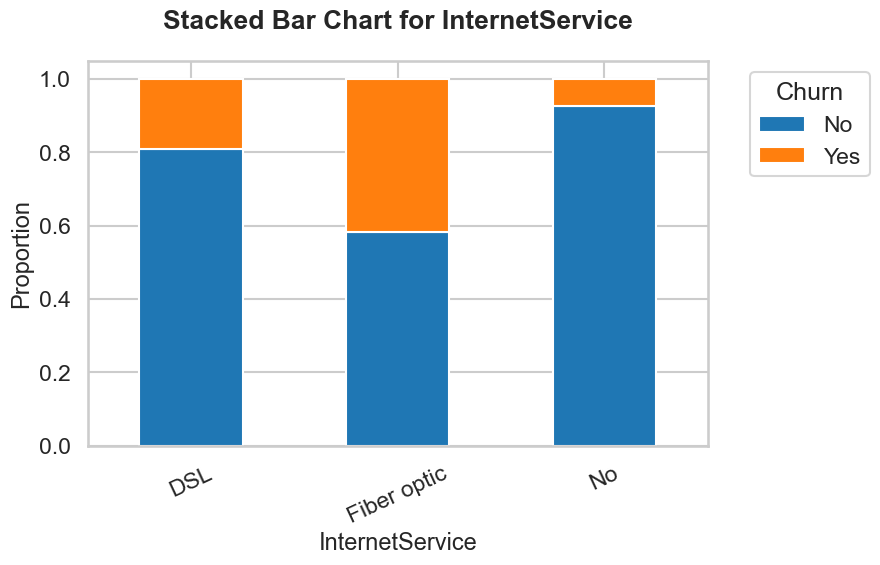

In [57]:
plot_stacked_bar('InternetService')

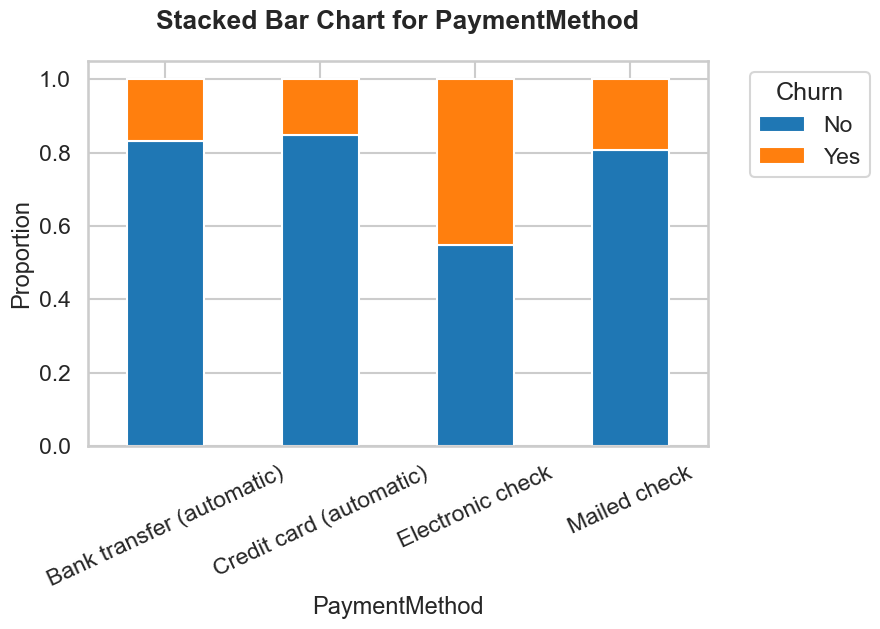

In [58]:
plot_stacked_bar('PaymentMethod')

## 6️⃣ **Multivariate Analysis** 

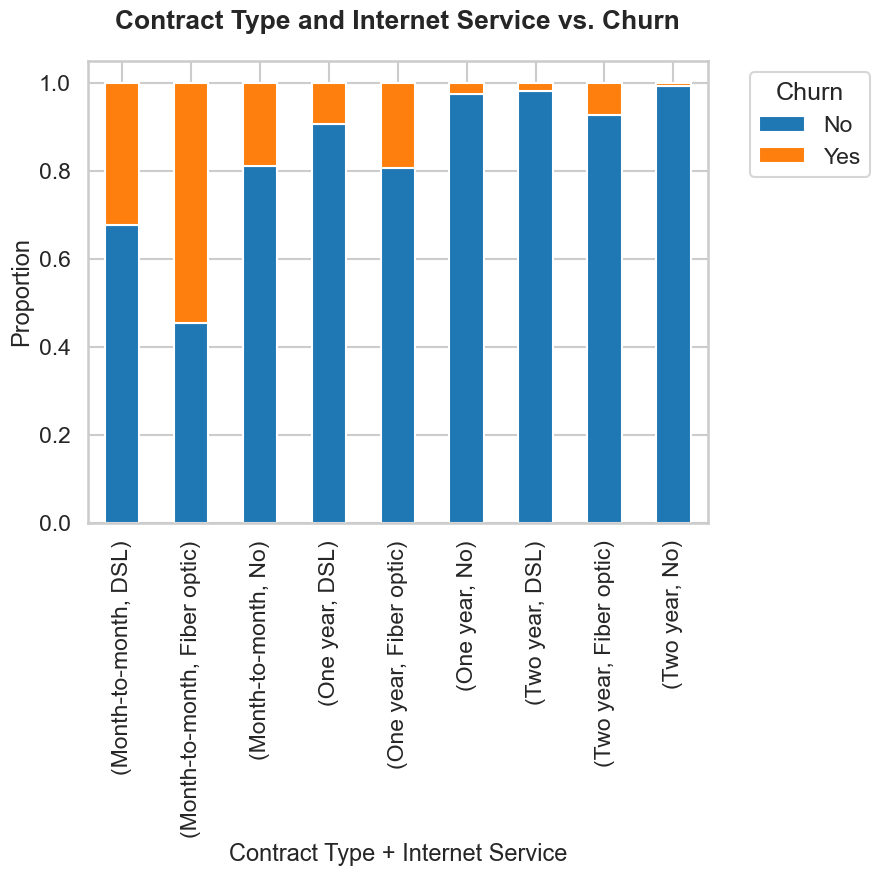

In [60]:
# contract + internet service vs churn
ci = pd.crosstab(index=[df['Contract'], df['InternetService']], columns=df['Churn'], normalize='index')
ci.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Contract Type and Internet Service vs. Churn", fontweight='bold')
plt.xlabel("Contract Type + Internet Service")
plt.ylabel("Proportion")
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Customers with **month-to-month contracts and fiber optic internet** have the highest churn rate.  
- On the other hand, customers with **two-year contracts** and either **DSL** or **no internet service** churn the least.  
- This makes sense, as longer contracts and simpler services lead to customer loyalty, while high-cost, short-term plans result in more churn.

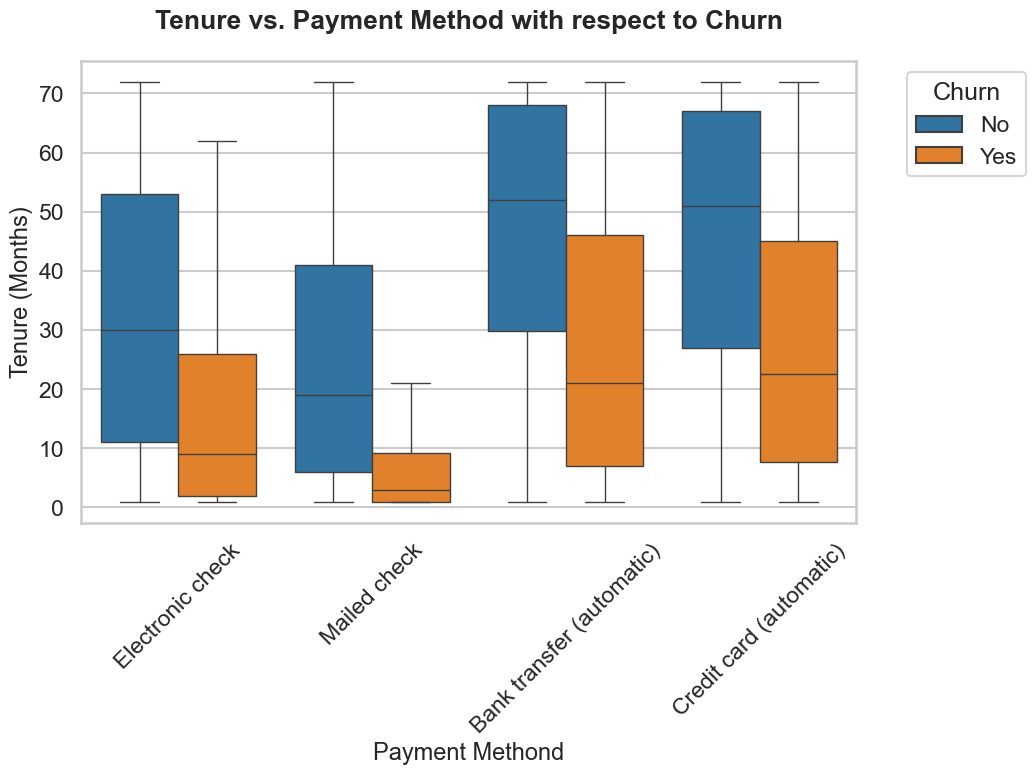

In [62]:
# tenure + payment method vs churn
plt.figure(figsize=(10,6))
sns.boxplot(df, x='PaymentMethod', y='tenure', hue='Churn', showfliers=False)
plt.title('Tenure vs. Payment Method with respect to Churn', fontweight='bold')
plt.xlabel('Payment Methond')
plt.ylabel('Tenure (Months)')
plt.xticks(rotation=45)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Customers using **electronic checks** have higher churn rates and generally lower tenure.  
- People paying with **mailed checks** also leave earlier, but it’s not as extreme.  
- **Automatic payments** (bank transfer or credit card) are clearly associated with longer customer retention.  
- Longer tenure usually means more loyalty, and automatic payment methods seem to encourage that.  


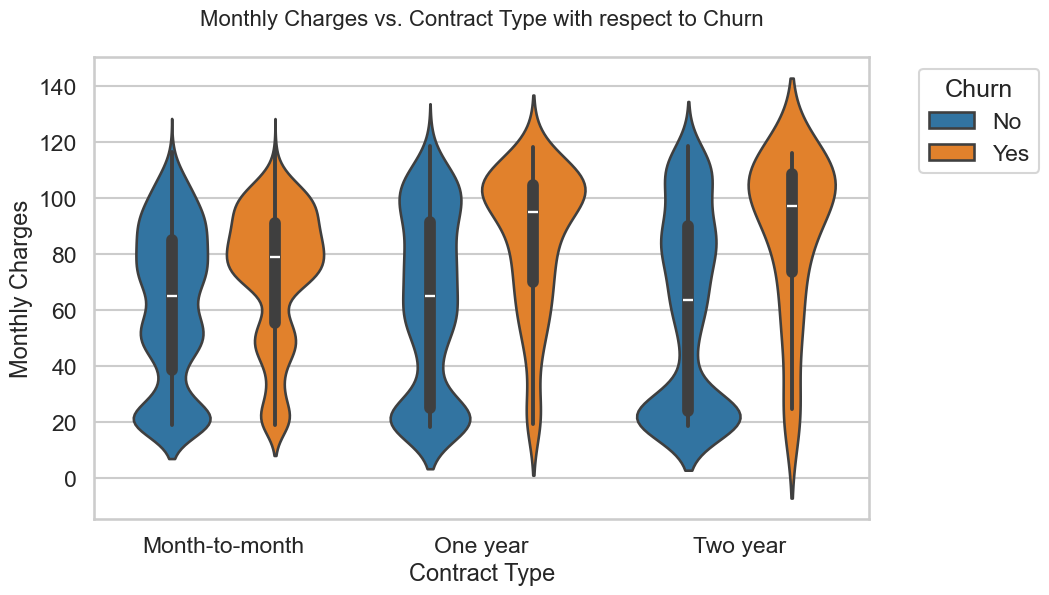

In [64]:
# monthly charges + contract vs. churn
plt.figure(figsize=(10,6))
sns.violinplot(df, x='Contract', y='MonthlyCharges', hue="Churn")
plt.title('Monthly Charges vs. Contract Type with respect to Churn', fontsize=16)
plt.xlabel("Contract Type")
plt.ylabel("Monthly Charges")
plt.legend(title= "Churn", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Churn is highest among **month-to-month** contract holders, especially those with higher monthly charges.  
- **One-year** and **two-year** contract customers have much lower churn, and their charges seem more balanced.  
- Customers locked into long-term contracts are clearly more stable and less likely to leave.  
- Overall, flexibility in contracts seems to lead to higher churn.  

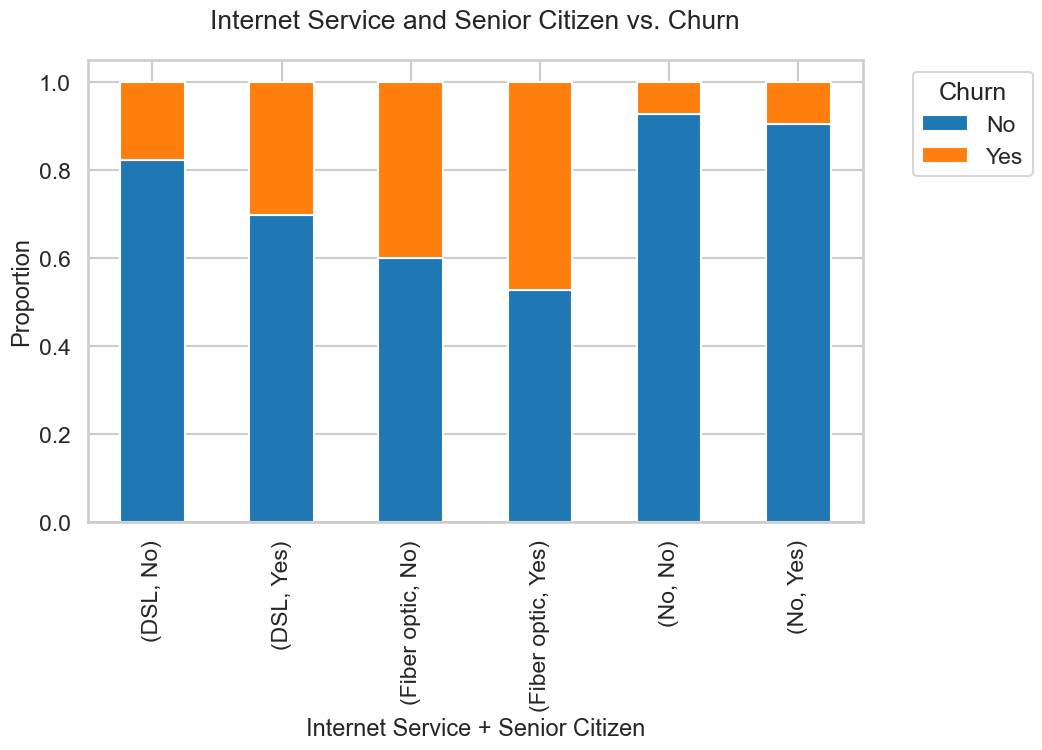

In [66]:
# Internet Service + Senior Citizen vs Churn
its = pd.crosstab(index=[df['InternetService'], df["SeniorCitizen"]], columns=df['Churn'], normalize='index')
its.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Internet Service and Senior Citizen vs. Churn")
plt.xlabel('Internet Service + Senior Citizen')
plt.ylabel("Proportion")
plt.legend(title="Churn", bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

- Senior citizens with **fiber optic internet** show the highest churn rate.  
- Even non-senior fiber optic users have a higher churn rate compared to those using DSL.  
- **DSL users** appear to be more loyal and stable.  
- Customers without internet service almost never churn, probably because they use fewer services and have fewer frustrations.  
- Fiber optic + older customers = biggest churn risk zone.  

In [68]:
temp = df.copy()
temp['Churn'] = np.where(temp.Churn == 'Yes', 1, 0)
temp = temp.drop('tenure', axis=1)

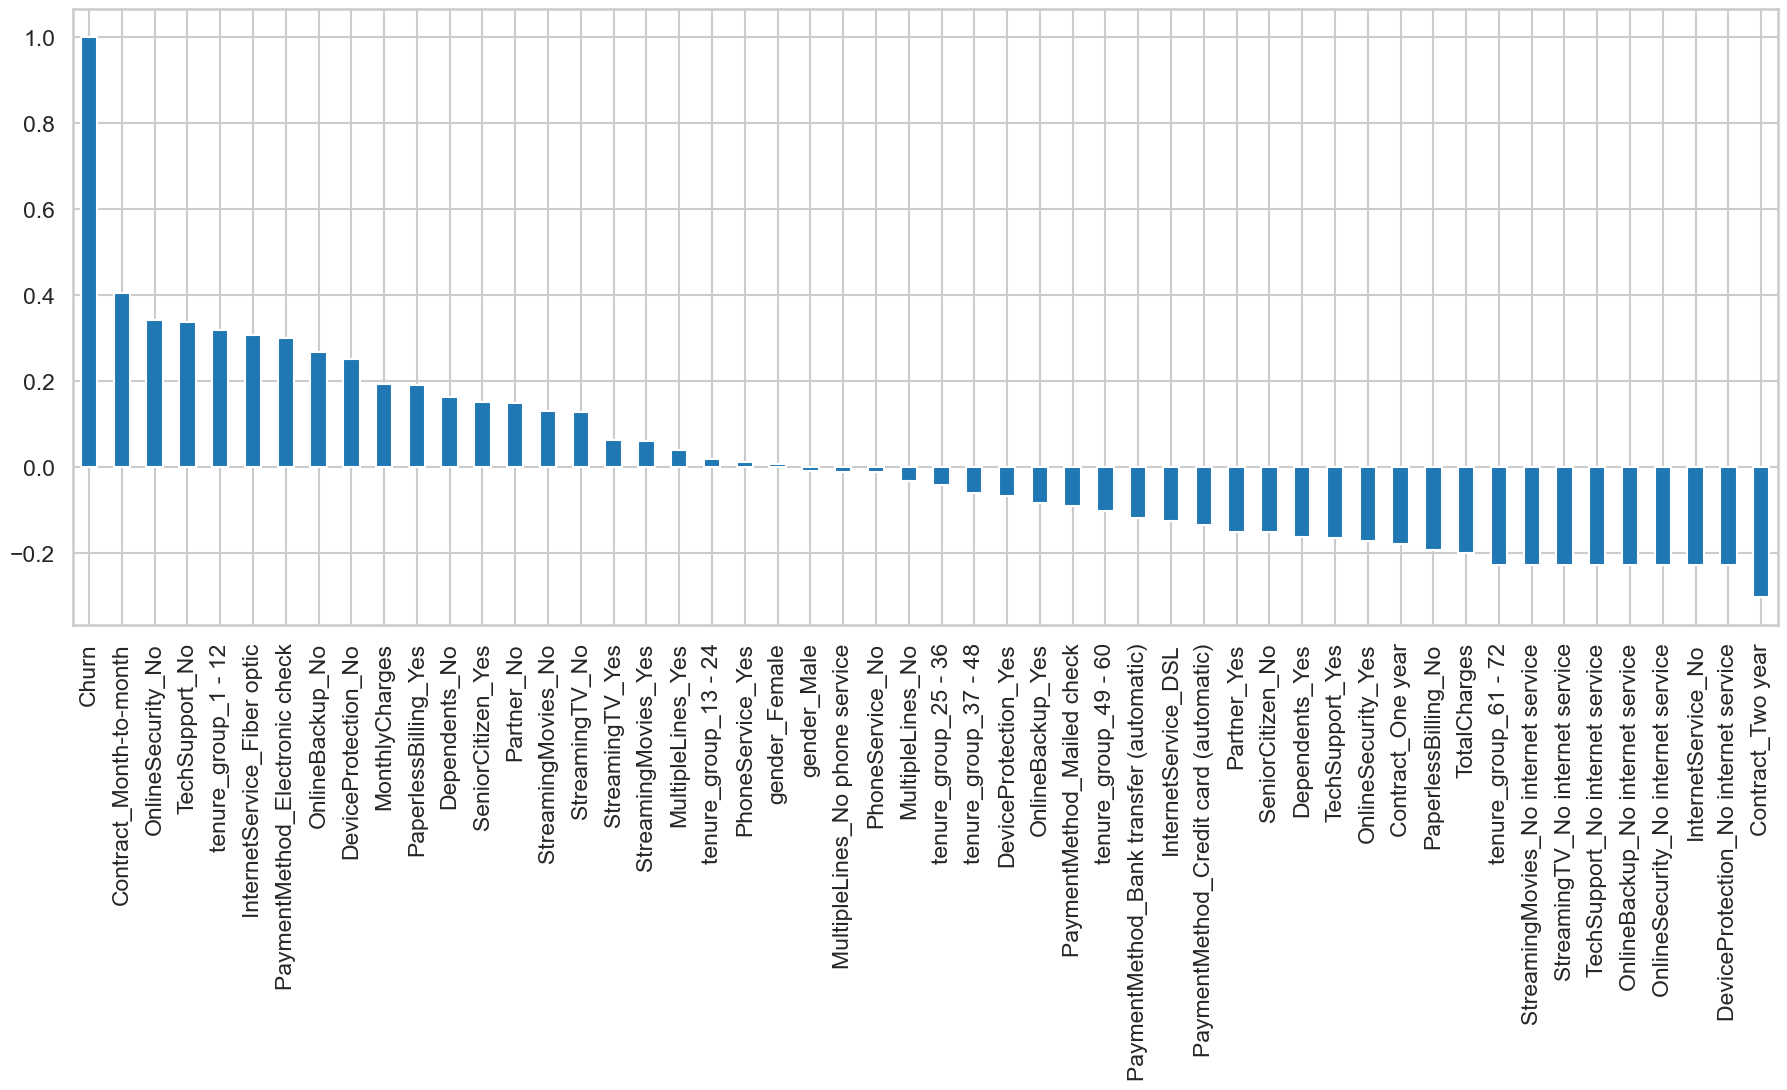

In [69]:

plt.figure(figsize=(22, 8))
temp1 = pd.get_dummies(temp, dtype=np.int32)
temp1.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

### Key Observations:

- **More churn** seen in:  
  - **Fiber optic users**  
  - **Electronic check payments**  
  - **High monthly charges** and **paperless billing**  

- **Less churn** seen in:  
  - **Long-term customers (5+ years)**  
  - **Two-year contracts**  
  - Customers with **tech support, security, and backup services**  
  - **Auto credit card payments**  

- **No real impact** from:  
  - **Gender**, **phone service**, and **multiple lines**  

### In short:
People with high bills and fiber internet leave more. Long contracts, loyalty, and extra services help keep customers.


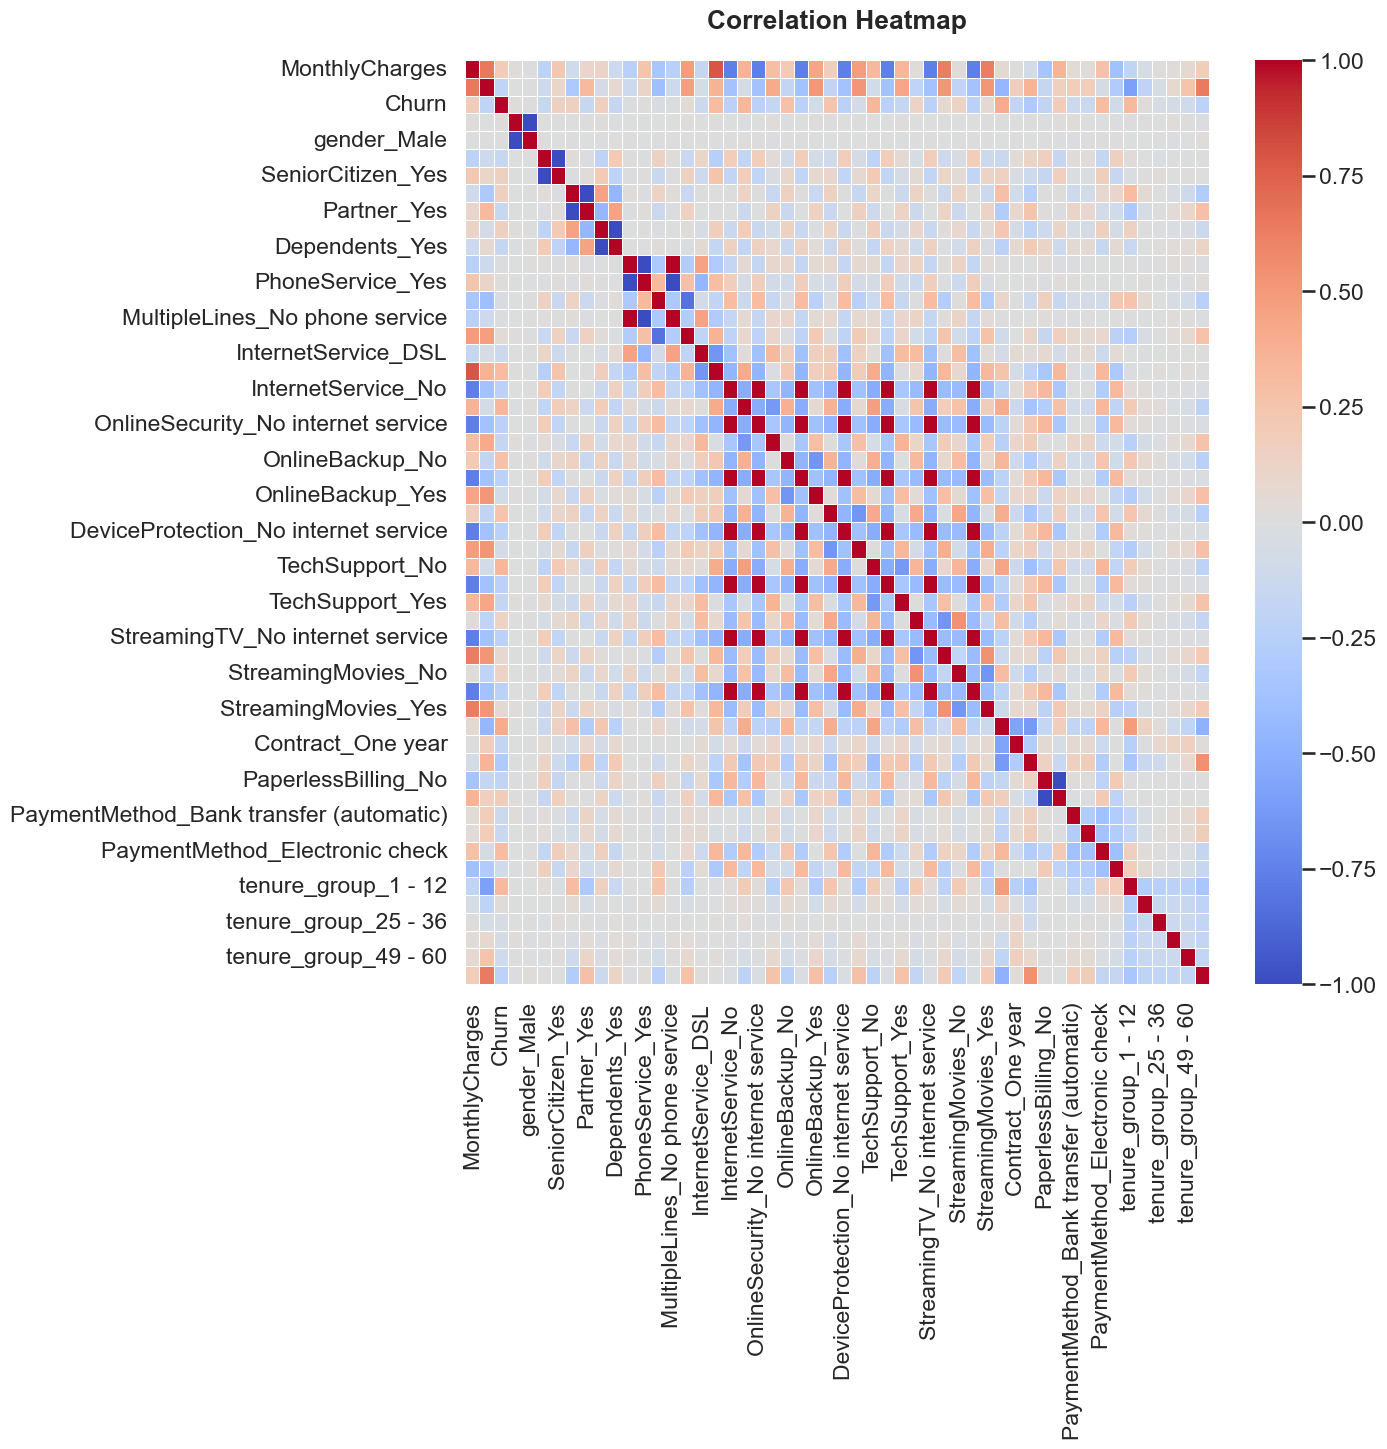

In [71]:
plt.figure(figsize=(12,12))
sns.heatmap(temp1.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap", fontweight='bold')
plt.show()

## 🎯 What I Found from the Telco Churn Data  

After going through the Telco churn data, here’s what I noticed:  

1. **Churn Rate:**  
   - About **26.5%** customers have left — that’s pretty high and something to worry about.  

2. **Who’s Leaving More:**  
   - **Senior citizens** are more likely to churn.  
   - **Gender** doesn’t seem to matter much.  

3. **Tenure Insight:**  
   - People with **less than a year** with the company leave the most.  
   - Long-time customers usually stay loyal.  

4. **Contract Type:**  
   - **Month-to-month** plans have the highest churn.  
   - **One or two-year contracts** are much more stable.  

5. **Internet Service:**  
   - **Fiber optic** customers leave more compared to DSL or no-internet users. Probably due to cost or service issues.  

6. **Charges Factor:**  
   - Customers paying **higher monthly charges** churn more.  
   - But those with **high total charges** (been around longer) usually stay.  

7. **Payments:**  
   - **Electronic checks** are linked to more churn.  
   - Auto-pay methods seem to help keep customers.  

8. **Add-ons:**  
   - People without **security, backup, or tech support** are leaving more.  
   - Adding these services might help reduce churn.